# Analysis of the autism data

In [6]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


# Dataset Illustration

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df[['diagnosis', 'language', 'app_version', 'features_extracted', 'face_tracking', 'age',
    'sex', 'ethnicity', 'race', 'primary_education',
    'mullen_el', 'mullen_fm', 'mullen_rl', 'mullen_vr',
       'mullen_elc_std', 'ados_total', 'ados_rrb', 'ados_sa',
       'srs_total_tscore', 'srs_social_awareness_tscore',
       'srs_social_motivation_tscore', 'cbcl_scaleIV_score',
       'cbcl_asd_score', 'mchat_total', 'mchat_final', 'mchat_result',
       'BB_gaze_percent_right', 'BB_gaze_silhouette_score',
       'S_gaze_percent_right', 'S_gaze_silhouette_score',
       'FP_gaze_speech_correlation', 'FP_gaze_silhouette_score',
       'proportion_of_name_call_responses',
       'average_response_to_name_delay', 'FB_postural_sway',
       'FB_postural_sway_derivative', 'DIGC_postural_sway',
       'DIGC_postural_sway_derivative', 'DIGRRL_postural_sway',
       'DIGRRL_postural_sway_derivative', 'ST_postural_sway',
       'ST_postural_sway_derivative', 'MP_postural_sway',
       'MP_postural_sway_derivative', 'PB_postural_sway',
       'PB_postural_sway_derivative', 'BB_postural_sway',
       'BB_postural_sway_derivative', 'RT_postural_sway',
       'RT_postural_sway_derivative', 'MML_postural_sway',
       'MML_postural_sway_derivative', 'PWB_postural_sway',
       'PWB_postural_sway_derivative', 'FP_postural_sway',
       'FP_postural_sway_derivative', 'number_of_touches',
       'average_length', 'std_length', 'average_error', 'std_error',
       'number_of_target', 'pop_rate', 'average_touch_duration',
       'std_touch_duration', 'average_delay_to_pop', 'std_delay_to_pop',
       'average_force_applied', 'std_force_applied',
       'average_accuracy_variation', 'accuracy_consistency',
       'average_touches_per_target', 'std_touches_per_target',
       'average_time_spent', 'std_time_spent', 'exploratory_percentage',
       'completed', 'StateOfTheChild', 'SiblingsInTheRoom',
       'ShotsVaccines', 'Distractions', 'FamilyMemberDistract',
       'PetDistract', 'PetNoiseDistract', 'DoorbellPhoneDistract',
       'TVOnDistract', 'OtherDistract', 'SittingUp', 'Hungry', 'Diaper',
      'validity_available',
       'administration_number', 'S_postural_sway', 'NS_postural_sway',
       'gaze_silhouette_score', 'inv_S_gaze_percent_right',
       'mean_gaze_percent_right']], title="Pandas Profiling Report")


profile.to_file("./autism_report_df.html")


In [20]:
def select(data,feature,value,unique=False):
    """Example : select(data,'ASD+',1,unique=True)
                 select(data,'sex','Male')
    """
    if unique:
        data_unique=data.drop_duplicates(subset = "id",keep='first')
        selected_data = data_unique[data_unique[feature]==value]
    else:
        selected_data = data[data[feature]==value]
    return(selected_data)

Predicting diagnosis based on 40 features

**********************************
 statistics:

**********************************
1220 subjects 
697  male
523  female
0  unknown sex beacause of missing clinical data 


**********************************
192 subjects in the ASD group
136 number of male
56 number of female 
 

**********************************
950 subjects in the TD group
502 number of male
448 number of female 


**********************************
29 subjects in the DL/DD group
21 number of male
8 number of female 


**********************************
49 subjects in the ADHD group
38 number of male
38 number of female 



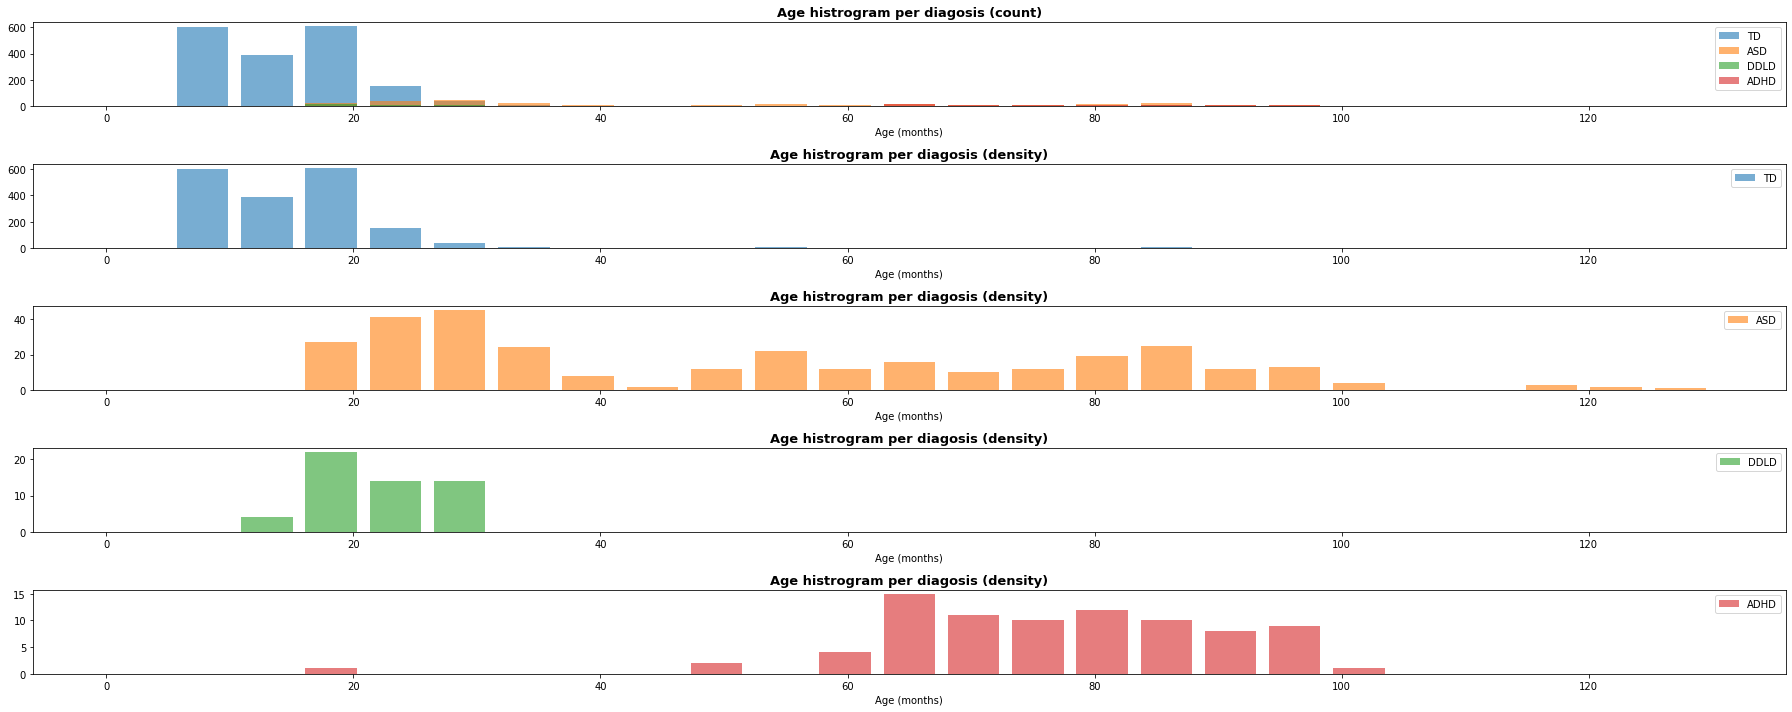

In [54]:
df = pd.read_csv("/home01/sam/df_all.csv")

data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               proportion_train=1)

DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3.}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd'}
           
    
fig, axes = plt.subplots(5, 1, figsize=(25, 10)); axes=axes.flatten()

for i, d in df.groupby('diagnosis'):
    axes[0].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
axes[0].legend(); axes[0].set_title("Age histrogram per diagosis (count)", weight='bold', fontsize=13); axes[0].set_xlabel("Age (months)")

for i, d in df.groupby('diagnosis'):
    axes[int(i+1)].hist(d['age'], bins=np.linspace(0, 130, 26), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    axes[int(i+1)].legend(); axes[int(i+1)].set_title("Age histrogram per diagosis (density)", weight='bold', fontsize=13);axes[int(i+1)].set_xlabel("Age (months)")
plt.tight_layout()


"""
    Print population statistics at the beginning of the notebook.
"""
print('\n**********************************')
print(' statistics:')
print('\n**********************************')
data = df
# Masks
data_unique=data.drop_duplicates(subset = "id",keep='first')
data_unique_asd = select(data,'diagnosis',1,True)
data_unique_nasd = select(data,'diagnosis',0,True)
data_male = select(data,'sex',0)
data_female = select(data,'sex',1)
data_asd = select(data,'diagnosis',1)
data_nasd = select(data,'diagnosis',0)


#Count the number of subjects
subjects_id = np.unique(data['id'])
number_of_subjects = len(subjects_id)

subject_male = np.sum(data_unique['sex']==0)
subject_female = np.sum(data_unique['sex']==1)
subject_unknown = np.sum(pd.isna(data_unique['sex']))

print('{} subjects '.format(number_of_subjects))
print('{}  male'.format(subject_male))
print('{}  female'.format(subject_female)) 
print('{}  unknown sex beacause of missing clinical data \n'.format(subject_unknown)) 

# mchat_total_1_positive=data_unique.loc[data_unique['clinical_mchat_total_score']>=3]
# mchat_final_1_positive = mchat_total_1_positive.loc[mchat_total_1_positive['clinical_final_mchat_score']>=2]    
# mchat_total_2_positive=data_unique.loc[data_unique['clinical_mchat_total_score2']>=3]
# mchat_final_2_positive = mchat_total_1_positive.loc[mchat_total_1_positive['clinical_final_mchat_score2']>=2]    

# print('\n**********************************')
# print('{} subjects are "mchat positive" (First Adminisstration) '.format(len(mchat_final_1_positive)))
# print('{} subjects are "mchat positive" (Second Adminisstration) '.format(len(mchat_final_2_positive)))


nasd_subjects_id = data_unique_nasd[['id','sex']]
nasd_subject_male = np.sum(data_unique_nasd['sex']==0)
nasd_subject_female = np.sum(data_unique_nasd['sex']==1)

asd_subjects_id = data_unique_asd[['id','sex']]
asd_subject_male = np.sum(data_unique_asd['sex']==0)
asd_subject_female = np.sum(data_unique_asd['sex']==1)

dd_subjects_id = select(data_unique,'diagnosis', 2)[['id','sex']]
dd_subject_male = np.sum(dd_subjects_id['sex']==0)
dd_subject_female = np.sum(dd_subjects_id['sex']==1)

adhd_subjects_id = select(data_unique,'diagnosis', 3)[['id','sex']]
adhd_subject_male = np.sum(adhd_subjects_id['sex']==0)
adhd_subject_female = np.sum(adhd_subjects_id['sex']==1)

print('\n**********************************')
print('{} subjects in the ASD group'.format(len(asd_subjects_id)))
print('{} number of male'.format(asd_subject_male))
print('{} number of female \n '.format(asd_subject_female)) 


print('\n**********************************')
print('{} subjects in the TD group'.format(len(nasd_subjects_id)))
print('{} number of male'.format(nasd_subject_male))
print('{} number of female \n'.format(nasd_subject_female)) 



print('\n**********************************')
print('{} subjects in the DL/DD group'.format(len(dd_subjects_id)))
print('{} number of male'.format(dd_subject_male))
print('{} number of female \n'.format(dd_subject_female)) 

print('\n**********************************')
print('{} subjects in the ADHD group'.format(len(adhd_subjects_id)))
print('{} number of male'.format(adhd_subject_male))
print('{} number of female \n'.format(adhd_subject_male)) 

In [81]:
import missingno as msno

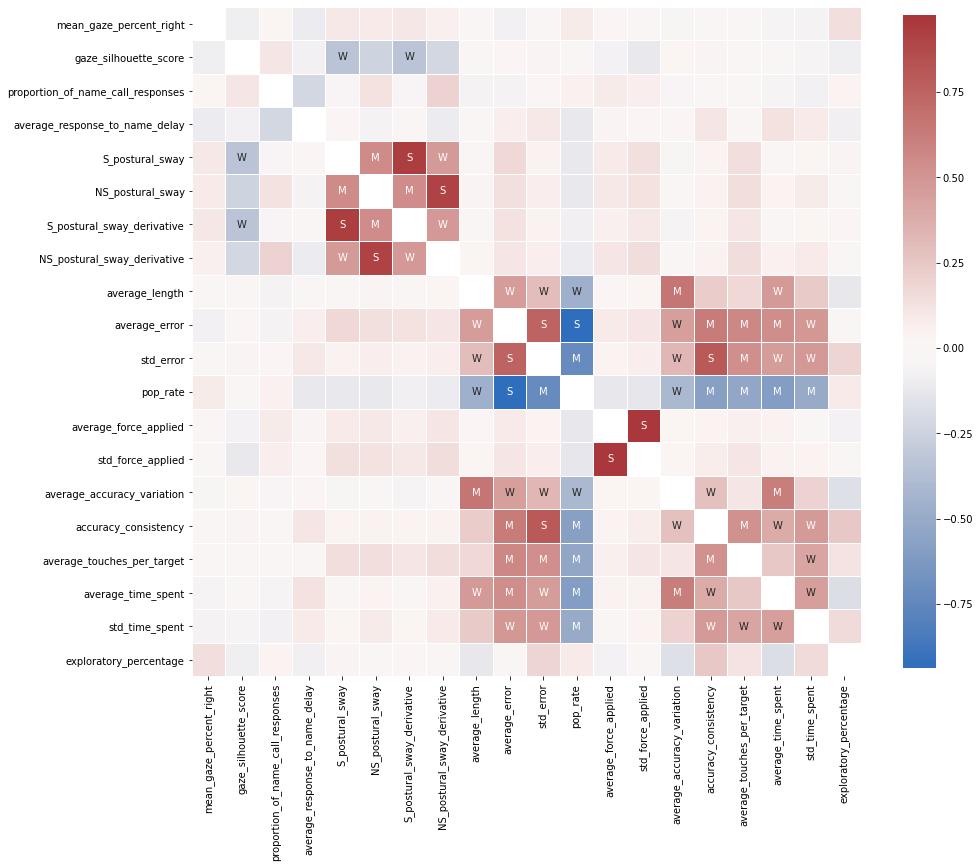

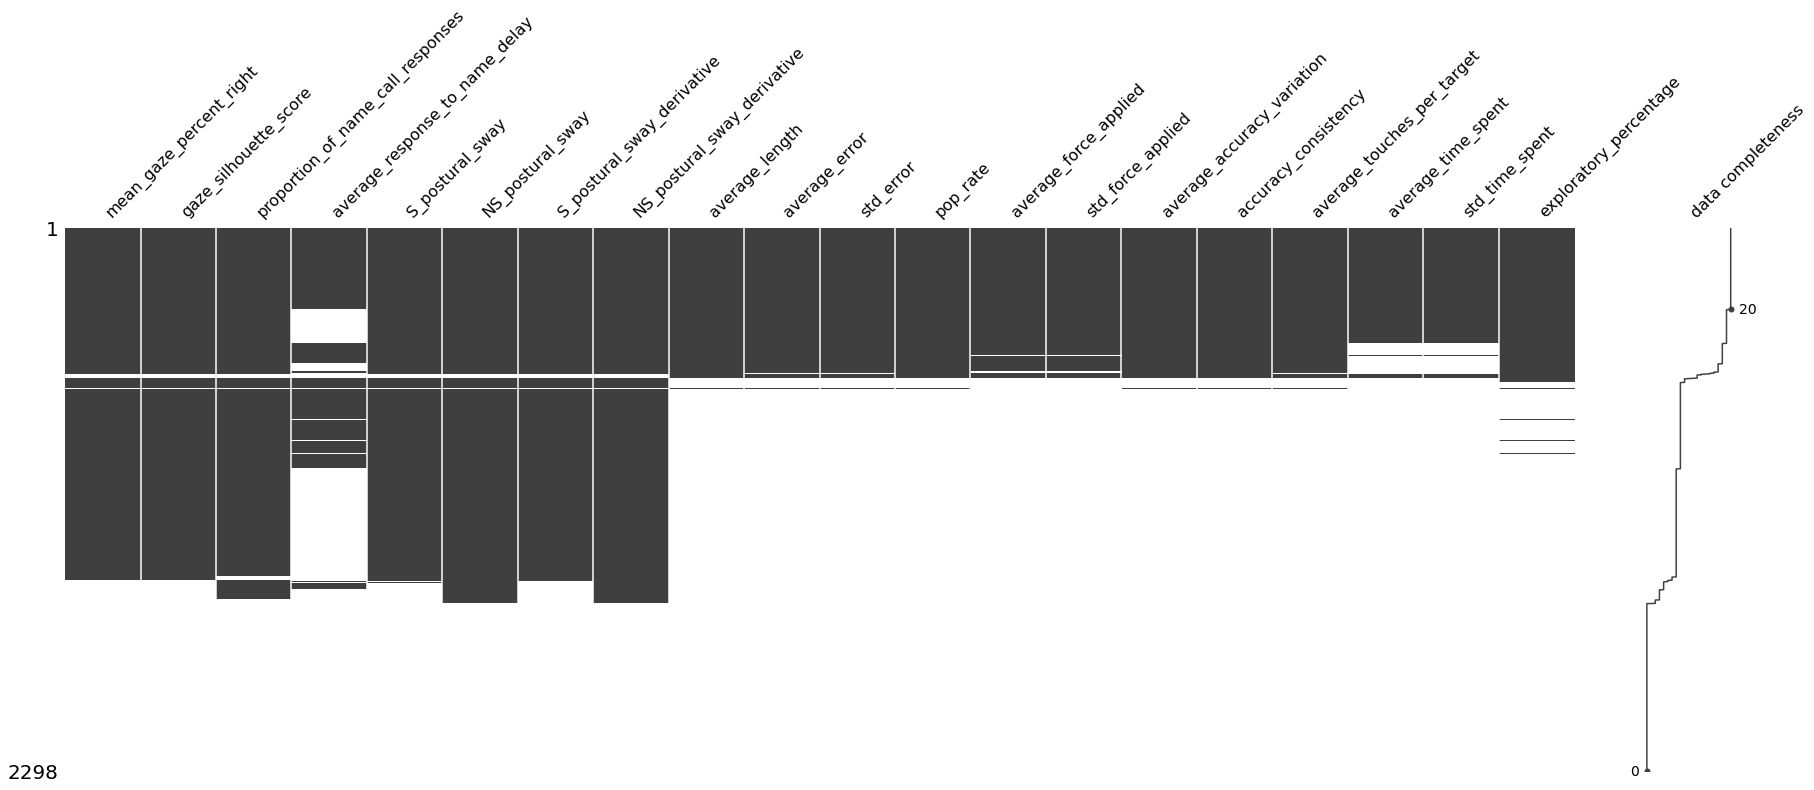

In [89]:
df_X = df[data.features_name[:int(len(data.features_name)//2)]]
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});


msno.matrix(df_X, labels=True, sort="descending", figsize=(30, 10));

In [102]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

pop_rate                     average_error           -0.936662
                             std_error               -0.723631
average_time_spent           pop_rate                -0.593849
accuracy_consistency         pop_rate                -0.582379
average_touches_per_target   pop_rate                -0.532550
                                                        ...   
std_error                    average_error            0.756120
accuracy_consistency         std_error                0.801857
NS_postural_sway_derivative  NS_postural_sway         0.912165
S_postural_sway_derivative   S_postural_sway          0.935392
std_force_applied            average_force_applied    0.973714
Length: 190, dtype: float64

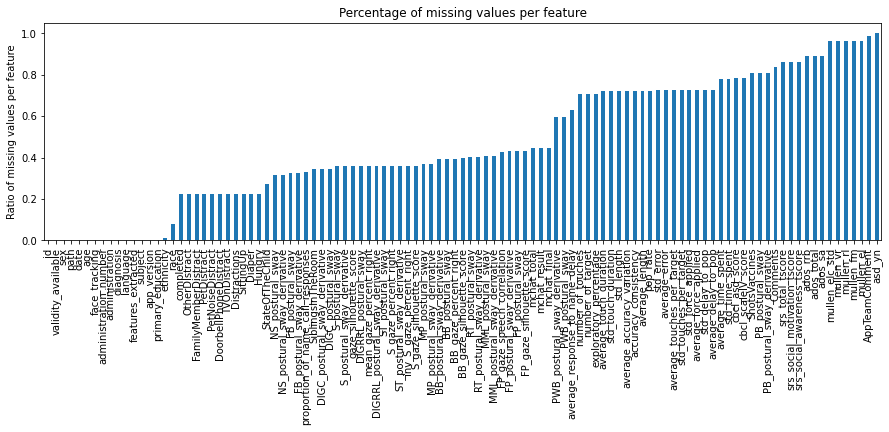

In [85]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

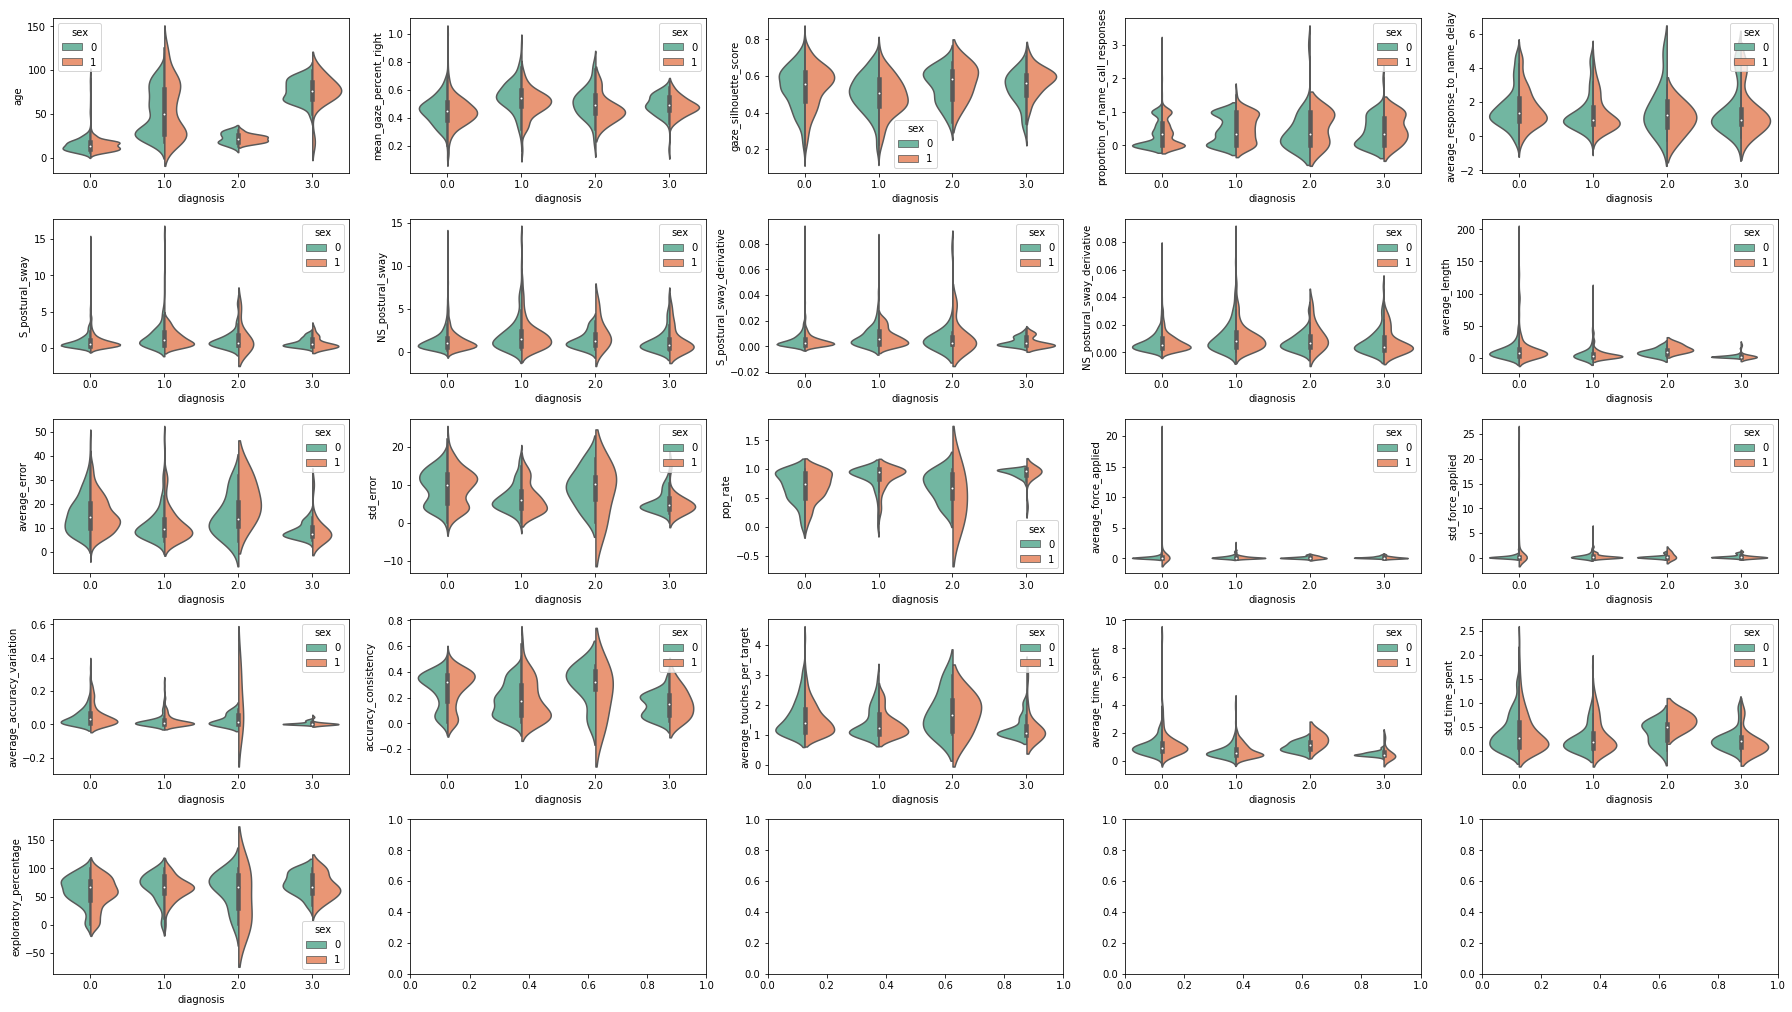

In [129]:
selected_features = ['age'] + data.features_name[:int(len(data.features_name)//2)]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(25, 14))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, y=col, x='diagnosis', hue='sex', palette="Set2",
                   split=True, ax=ax)
plt.tight_layout()

# Create experiments dataframe

In [26]:
from utils import create_autism_df
df = create_autism_df(folder_names = ['autism_all'])
df

dataset_name  experiment_number            approach missing_data_handling imputation_method                                      features_name n_features use_missing_indicator_variables scale_data sampling_method                         scenario num_samples  imbalance_ratio  ratio_of_missing_values  ratio_missing_per_class_0  ratio_missing_per_class_1 resolution  bandwidth  estimation_time num_cv     auc  Accuracy      F1     MCC  Sensitivity  Specificity  Precision     PPV     NPV     FNR     FDR     FOR
0    complete_autism                273             xgboost              encoding           without  ['S_postural_sway', 'mean_gaze_percent_right',...          5                           False       True         vanilla    asd_td_age_matched_n_balanced         237         0.926829                 0.115612                   0.060163                   0.175439         20        0.2         5.831619     16     NaN    0.7760  0.7780  0.5560       0.8160       0.7400     0.7440  0.7440  0.8120  0.1840  0.2560  0.1880
1    complete_autism                346  LogisticRegression              encoding           without  ['S_postural_sway', 'mean_gaze_percent_right',...          3                           False       True         vanilla  asd_td_age_matched_n_unbalanced         297         0.320000                 0.088664                   0.059259                   0.180556         20        0.2         0.027617      8     NaN    0.7780  0.1950  0.2430       0.1110       0.9910     0.8000  0.8000  0.7770  0.8890  0.2000  0.2230
2    complete_autism                338             xgboost              encoding           without  ['S_postural_sway', 'mean_gaze_percent_right',...          3                            True       True         vanilla  asd_td_age_matched_n_unbalanced         297         0.320000                 0.044332                   0.029630                   0.090278         20        0.2         5.025618     16     NaN    0.7710  0.4520  0.3180       0.3890       0.8930     0.5380  0.5380  0.8200  0.6110  0.4620  0.1800
3    complete_autism                311  LogisticRegression              encoding           without  ['S_postural_sway', 'mean_gaze_percent_right',...          4                           False       True         vanilla    asd_td_age_matched_n_balanced         237         0.926829                 0.117089                   0.060976                   0.177632         20        0.2         0.050949     16     NaN    0.7930  0.7880  0.5860       0.7980       0.7890     0.7780  0.7780  0.8080  0.2020  0.2220  0.1920
4    complete_autism                188             xgboost              encoding           without     ['S_postural_sway', 'mean_gaze_percent_right']          2                           False       True         without  asd_td_age_matched_n_unbalanced         297         0.320000                 0.090909                   0.060000                   0.187500         20        0.2         5.015151      8     NaN    0.7510  0.4480  0.2890       0.4170       0.8580     0.4840  0.4840  0.8210  0.5830  0.5160  0.1790
..               ...                ...                 ...                   ...               ...                                                ...        ...                             ...        ...             ...                              ...         ...              ...                      ...                        ...                        ...        ...        ...              ...    ...     ...       ...     ...     ...          ...          ...        ...     ...     ...     ...     ...     ...
353  complete_autism                 60                 ebm              encoding           without  ['S_postural_sway', 'mean_gaze_percent_right',...          5                            True       True         without  asd_td_age_matched_n_unbalanced         297         0.320000                 0.043771                   0.029333                   0.088889         20   

# Introduction - Dataset definition

In [18]:
df = pd.read_csv("/home01/sam/df_all.csv")
#df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
set_of_features  = {'asd_td_age_matched_n_balanced':["S_postural_sway", "mean_gaze_percent_right", "proportion_of_name_call_responses", "gaze_silhouette_score", "NS_postural_sway_derivative", "average_length"],
                    'asd_td_age_matched_n_unbalanced': ["S_postural_sway", "mean_gaze_percent_right", "NS_postural_sway", "proportion_of_name_call_responses", "NS_postural_sway_derivative", "gaze_silhouette_score"]}

scenario = 'asd_td_age_matched_n_balanced'

data = Dataset(df=df, 
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='vanilla',
               features_name=set_of_features[scenario],
               scenario=scenario,
               proportion_train=1)

Removing 149/2298 incomplete administrations.
Removing 953/2149 keeping first admin.
Removing 77/1196 keeping only subject with diagnosis: [0, 1].
Removing 389/1119 keeping only subject with age between 10 and 60 mo.
Removing 493/730 to match age. (removed diagnosis group : 0).
237 administrations left.


id
diagnosis     
0.0        123
1.0        114

Splitting dataset into test and train set.
Encoding 237 (train) and 0 (test) missing values with -5.
Upampling minority class. Imbalance ratio of: 0.93 to 1.00
Predicting diagnosis based on 12 features


# `multi_ditributions` approach

# `single_distribution` approach

# `Neural Additive Networks` approach

Encoding 237 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  Area Under the Curve (AUC)
0    0.7816                          0.7617                                  0.5632                                             0.7263                                                      0.8326                                           0.8011                           0.7666                                  0.2737                            0.1989                           0.2334                      0.8447

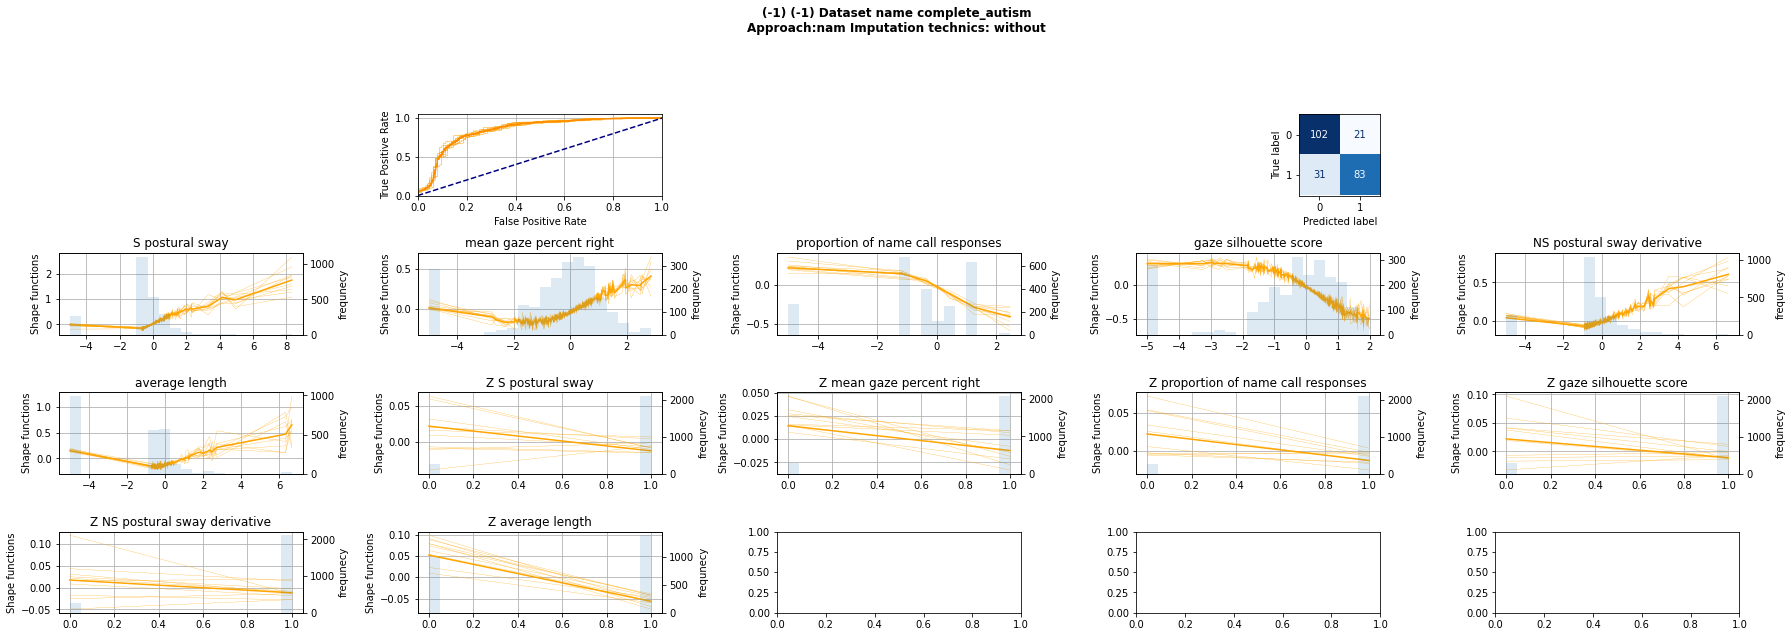

In [19]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='nam', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

# `Explanable Boosting Machine` approach

Encoding 237 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0     0.797                           0.795                                   0.596                                              0.816                                                        0.78                                            0.775                            0.821                                   0.184                             0.225                            0.179

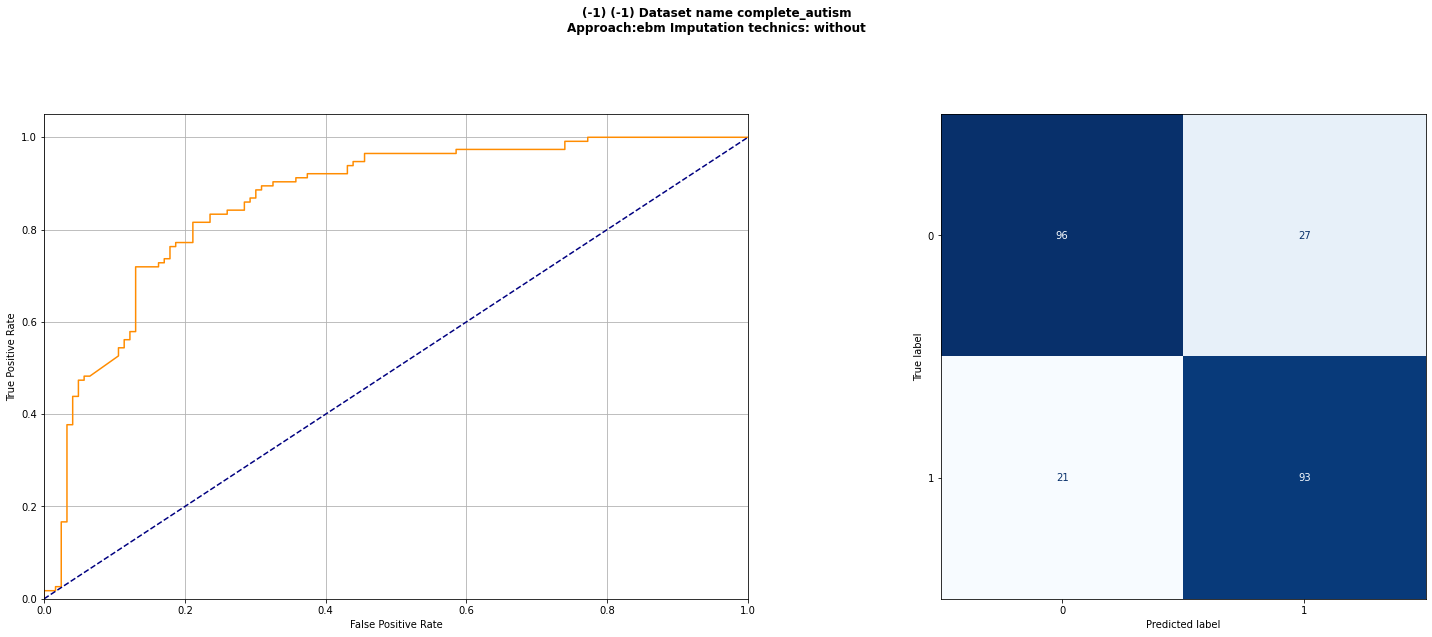

<!-- http://127.0.0.1:7280/139906984816528/ -->

In [20]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='ebm', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

# `Logistic Regression` approach

Encoding 237 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0     0.789                           0.783                                   0.578                                              0.789                                                       0.789                                            0.776                            0.802                                   0.211                             0.224                            0.198

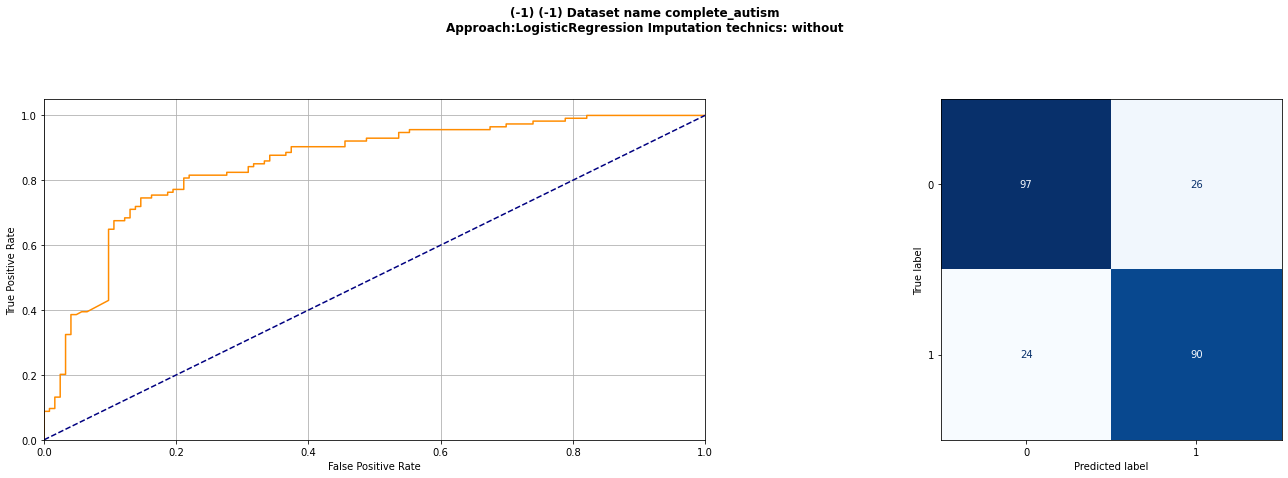

Not implemented yet.


In [21]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='LogisticRegression', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

# `DecisionTree` approach

Encoding 237 (train) and 0 (test) missing values with -5.


Accuracy  F1 score (2 PPVxTPR/(PPV+TPR))  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0     0.751                           0.742                                   0.502                                              0.746                                                       0.756                                            0.739                            0.762                                   0.254                             0.261                            0.238

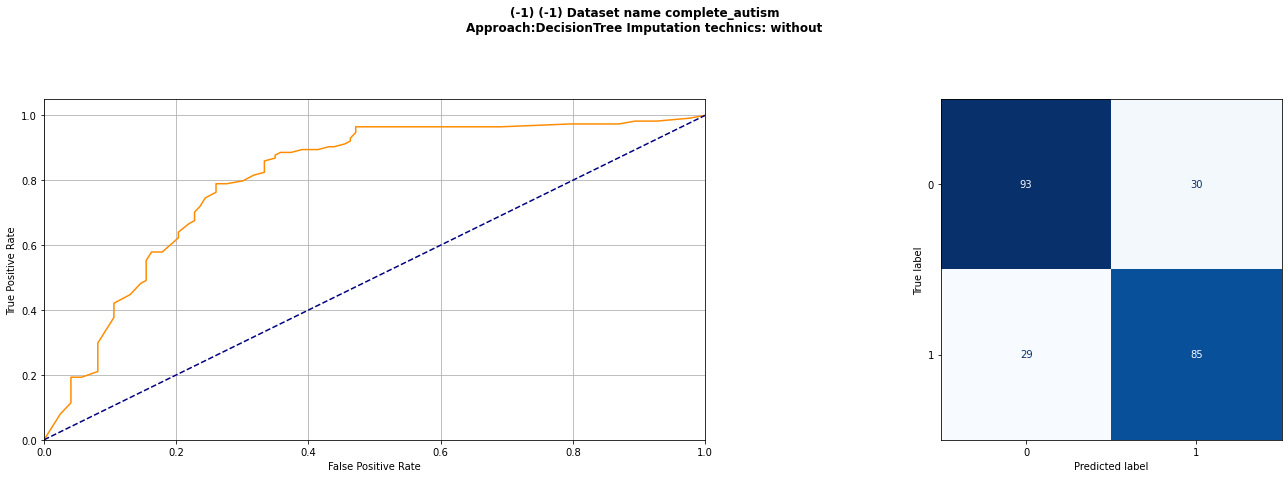

Not implemented yet.


In [22]:
exp = Experiments(data.dataset_name,
                dataset=data, 
                approach='DecisionTree', 
                proportion_train=PROPORTION_TRAIN, 
                resolution=RESOLUTION, 
                bandwidth=BANDWIDTH, 
                previous_experiment=None,        
                verbosity=1, 
                debug=True, 
                save_experiment=False)

exp.fit_predict(num_cv=16)
exp.plot()
                        
                

# `XGBoost` approach

In [24]:
df

id  diagnosis language app_version                                        subject                                     administration  features_extracted  face_tracking        age                date                                               path  sex  ethnicity  race  primary_education  asd_yn  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  \
788  300103        0.0  English         3.2  <Subject.S2KSubject object at 0x7f14f82b5a50>  <Administration.S2KAdministration object at 0x...                   1              1  20.590164 2021-05-10 16:30:00  /diskD/AutismCenter/Data/SenseToKnow/Processed...    1        0.0   0.0                8.0     NaN        NaN        NaN        NaN        NaN             NaN         NaN       NaN      NaN               NaN                          NaN                           NaN                 NaN             NaN          1.0          1.0           0.0               0.447829                  0.464719              0.481852                 0.769545                    0.377628                  0.698019                           0.000000                             NaN          0.256003                     0.000626            0.583792                       0.002204              0.440407                         0.001961          0.143405                     0.000237          0.376833   
789  300113        0.0  English         3.2  <Subject.S2KSubject object at 0x7f14f82d9210>  <Administration.S2KAdministration object at 0x...                   1              1  22.491803 2021-07-04 12:28:00  /diskD/AutismCenter/Data/SenseToKnow/Processed...    1        0.0   NaN                8.0     NaN        NaN        NaN        NaN        NaN             NaN         NaN       NaN      NaN               NaN                          NaN                           NaN                 NaN             NaN          1.0          1.0           0.0               0.375758                  0.478203              0.184178                 0.672051                    0.390016                  0.512949                           0.333333                        0.467133          1.758436                     0.008622            3.949268                       0.022842              1.678718                         0.010896          0.580973                     0.003239          1.103813   
790  300224        0.0  English         3.2  <Subject.S2KSubject object at 0x7f14f82d9990>  <Administration.S2KAdministration object at 0x...                   1              1  19.377049 2021-04-16 13:34:00  /diskD/AutismCenter/Data/SenseToKnow/Processed...    0        0.0   0.0                8.0     NaN        NaN        NaN        NaN        NaN             NaN         NaN       NaN      NaN               NaN                          NaN                           NaN                 NaN             NaN          3.0          0.0           0.0                    NaN                       NaN              0.453525                 0.324997                         NaN                       NaN                           0.000000                             NaN          0.292338                     0.000754            0.476432                       0.001731              3.371493                         0.018677          0.190611                     0.000371          0.215426   
791  300224        0.0  English         3.2  <Sub

# Preliminary experiment 1: Which imputation method to use ?

In [23]:
def check_unicity(df, x, hue):
    for _, f in df.groupby(by=[x, hue]):
        if len(f) > 1:
            display(f)
            return False
    return True

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25, 10))
fig.suptitle("Missingness Pattern: {}".format(DICT_MISSINGNESS[missingness_pattern]), weight='bold', fontsize=20)

sns.pointplot(data=df, x="approach", y="F1", hue='approach', hue_order = final_df['approach'].unique(), ci=False, ax = axes[i][j])

In [ ]:
for missingness_pattern in [1, 3, 4, 5]:
    
    fig, axes = plt.subplots(3, 3, figsize=(25, 10))
    fig.suptitle("Missingness Pattern: {}".format(DICT_MISSINGNESS[missingness_pattern]), weight='bold', fontsize=20)

    for i, imbalance_ratio in enumerate(sorted(final_df['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):

            df = final_df[(final_df['imbalance_ratio']==imbalance_ratio) & (final_df['dataset_name']==dataset_name)]

            axes[i][j] = sns.pointplot(data=df, x="ratio_of_missing_values", y="F1", hue='approach', hue_order = final_df['approach'].unique(), ci=False, ax = axes[i][j])
            axes[i][j].set_ylim([0,1])
            axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
            
    plt.tight_layout()

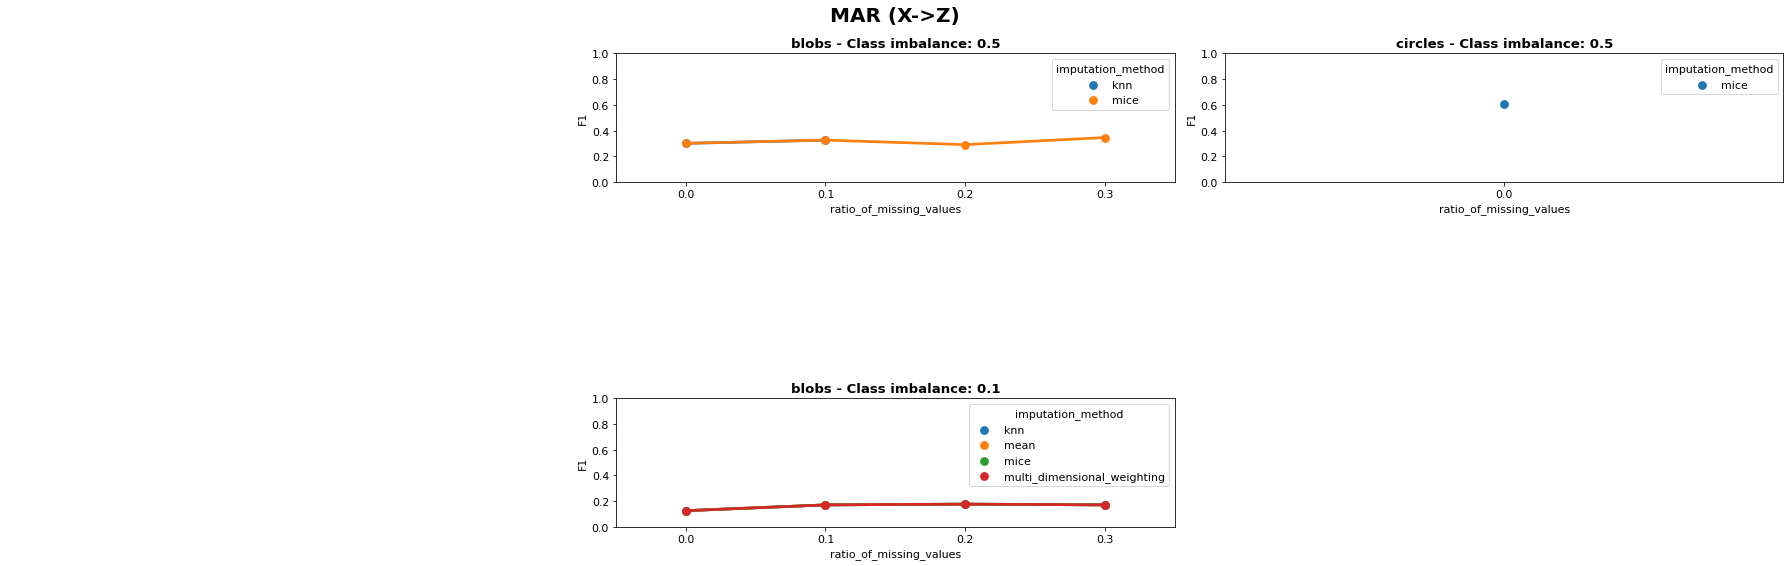

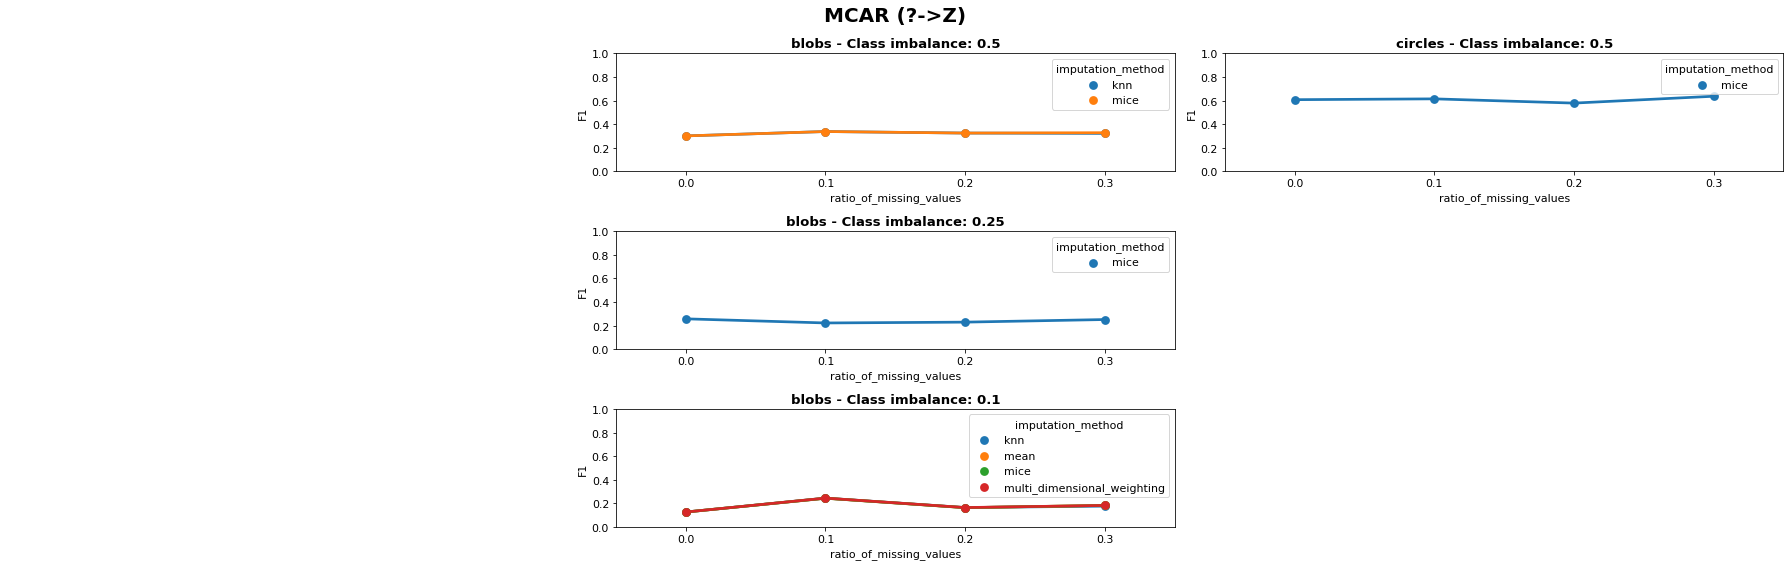

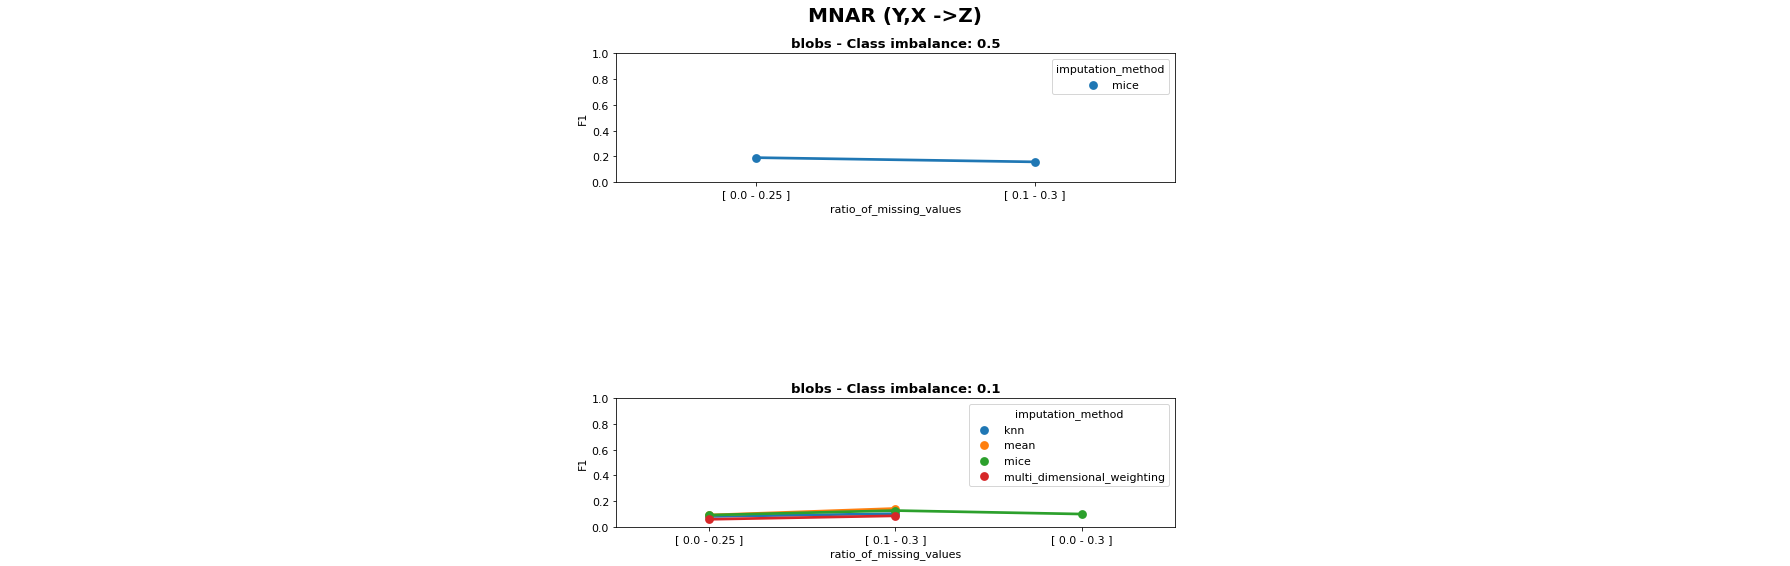

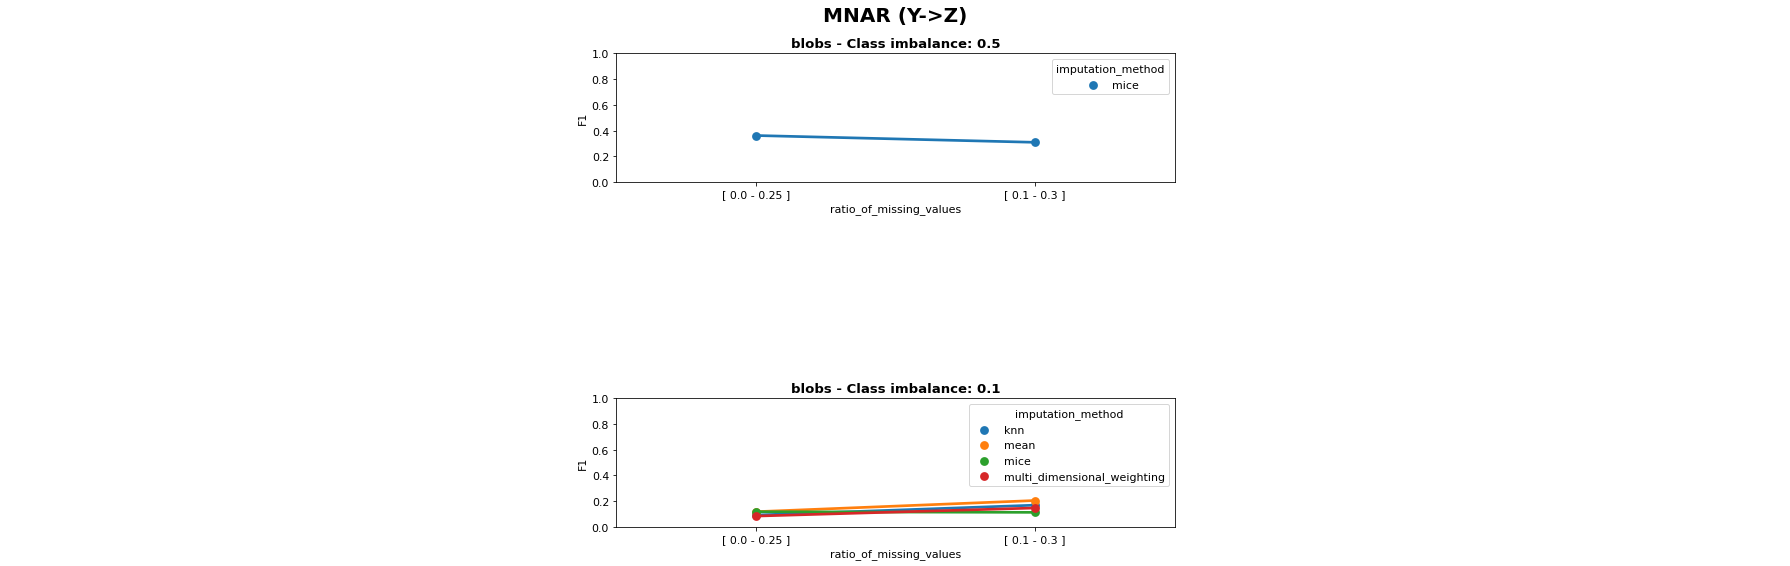

In [98]:


results = df

x = 'scenario'
hue = 'approach'
    
    
for missingness_pattern in results['missingness_pattern'].unique():

    fig, axes = plt.subplots(3, 3, figsize=(25, 8))
    fig.suptitle(missingness_pattern, weight='bold', fontsize=20)

    for i, imbalance_ratio in enumerate(sorted(results['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):
        
            
            df = results[(results['imbalance_ratio']==imbalance_ratio) & (results['dataset_name']==dataset_name) & (results['missingness_pattern']==missingness_pattern)]

            assert check_unicity(df, x, hue)
            
            if len(df) > 0:

                axes[i][j] = sns.pointplot(data=df, x="ratio_of_missing_values", y="F1", hue='imputation_method', ci=False, ax = axes[i][j])
                axes[i][j].set_ylim([0,1])
                axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
            else:
                axes[i][j].grid('off');axes[i][j].axis('off')

    plt.tight_layout()
    
    
    

# Preliminary experiment 2 : Using indicator variable or not ?

In [18]:
def check_unicity(df, x, hue):
    for _, f in df.groupby(by=[x, hue]):
        if len(f) > 1:
            display(f)
            return False
    return True

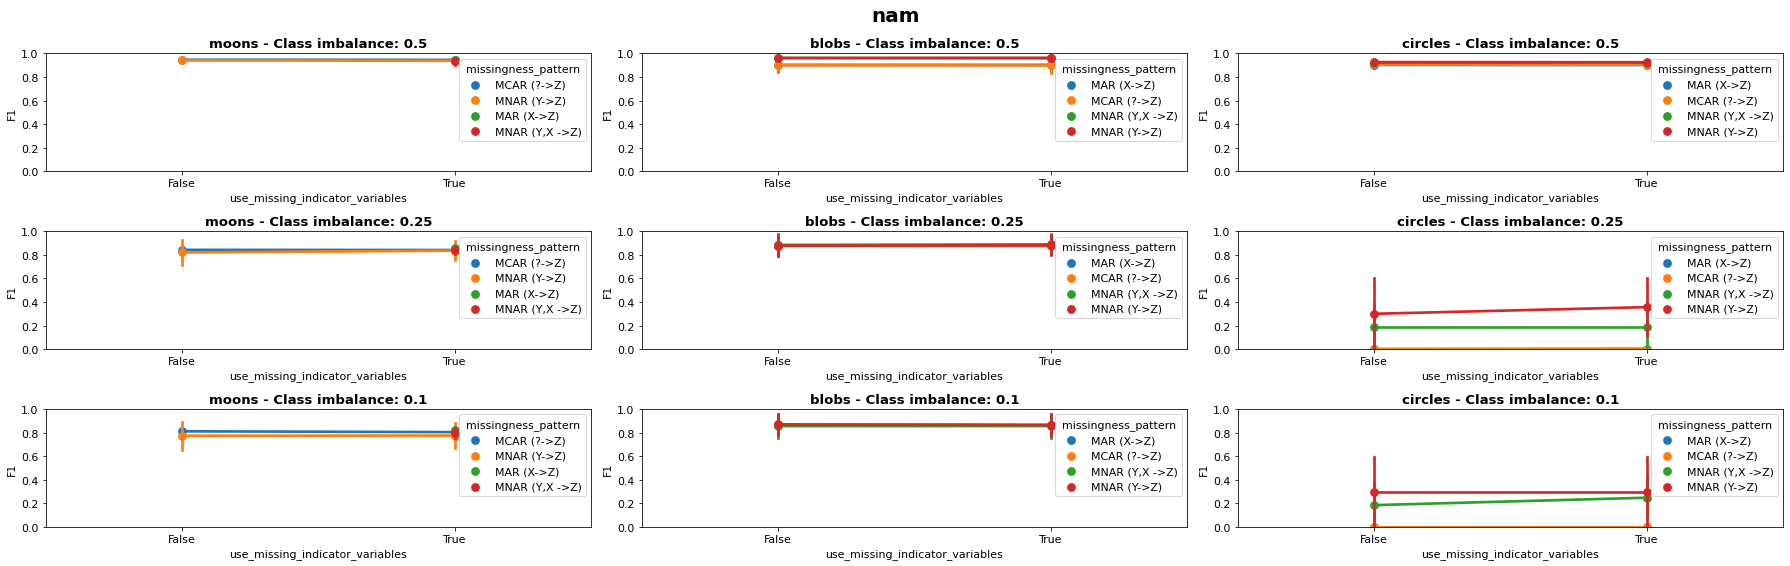

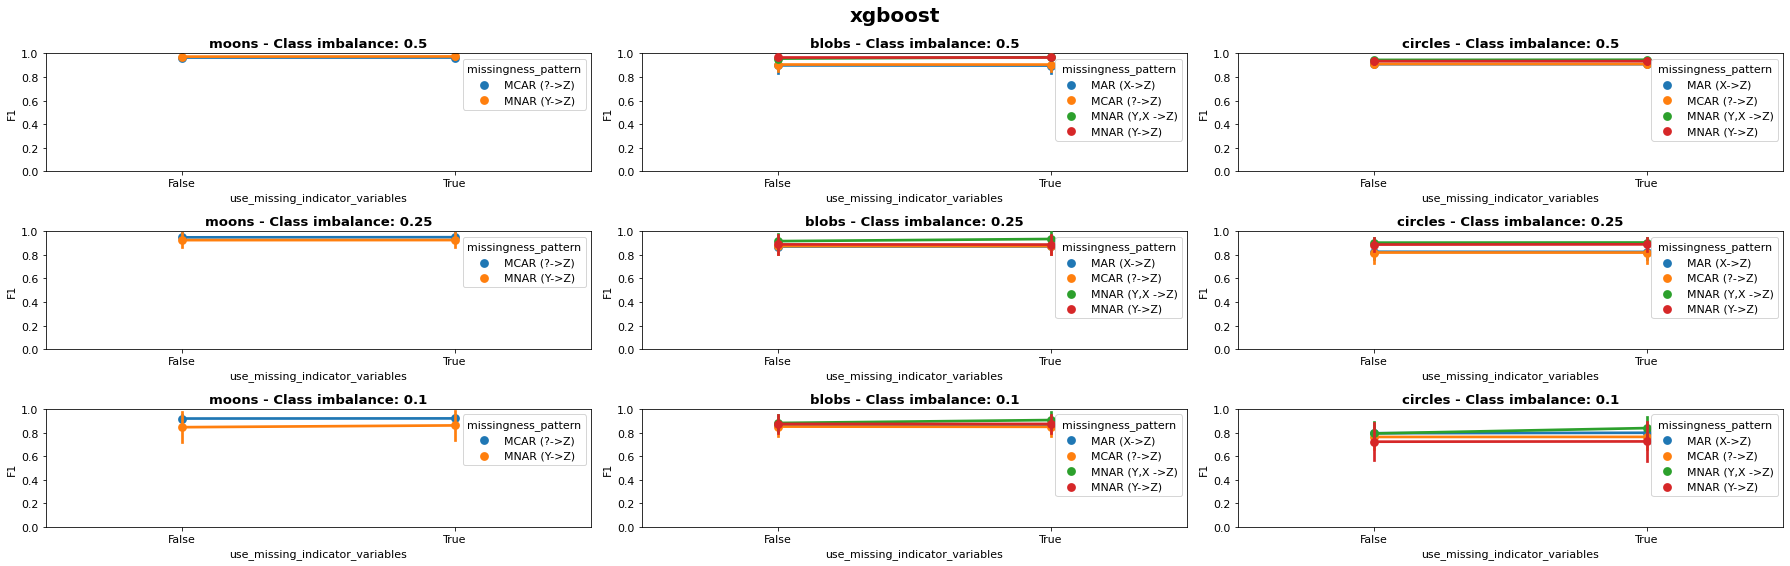

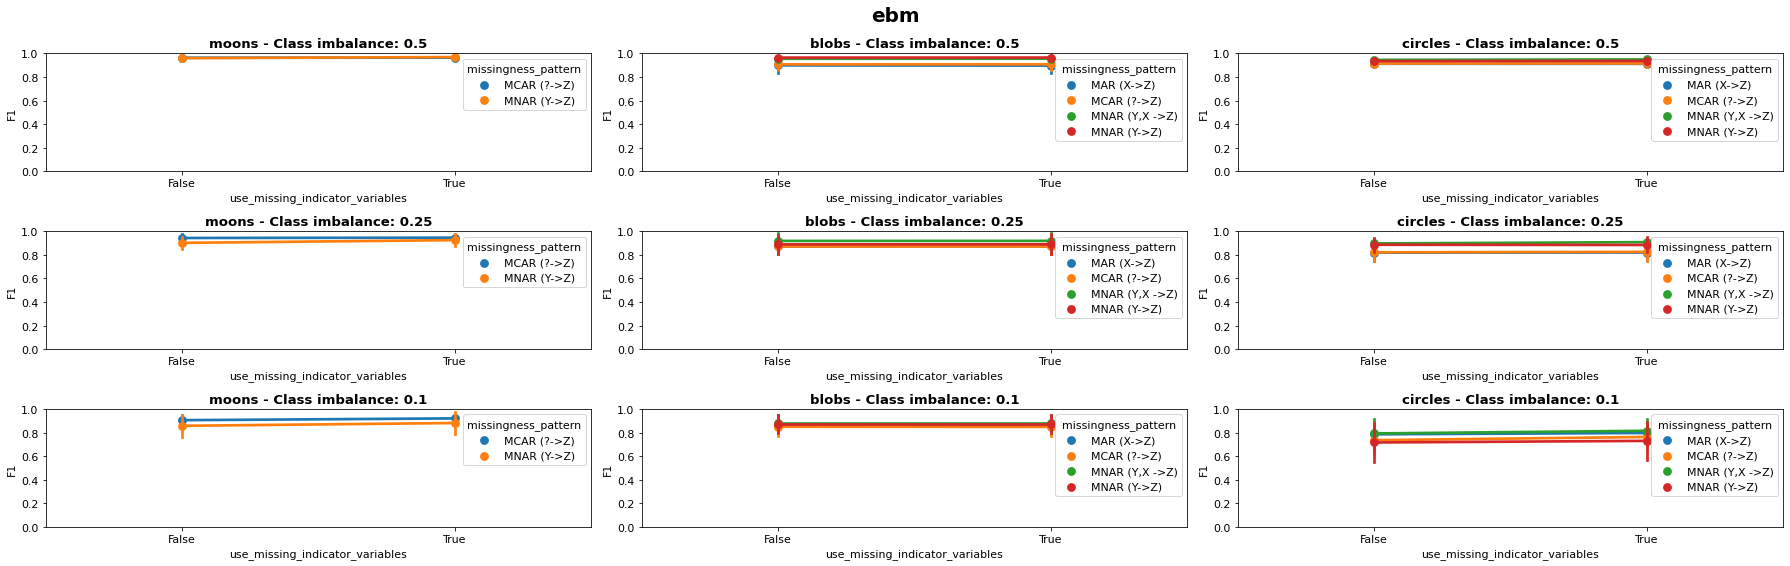

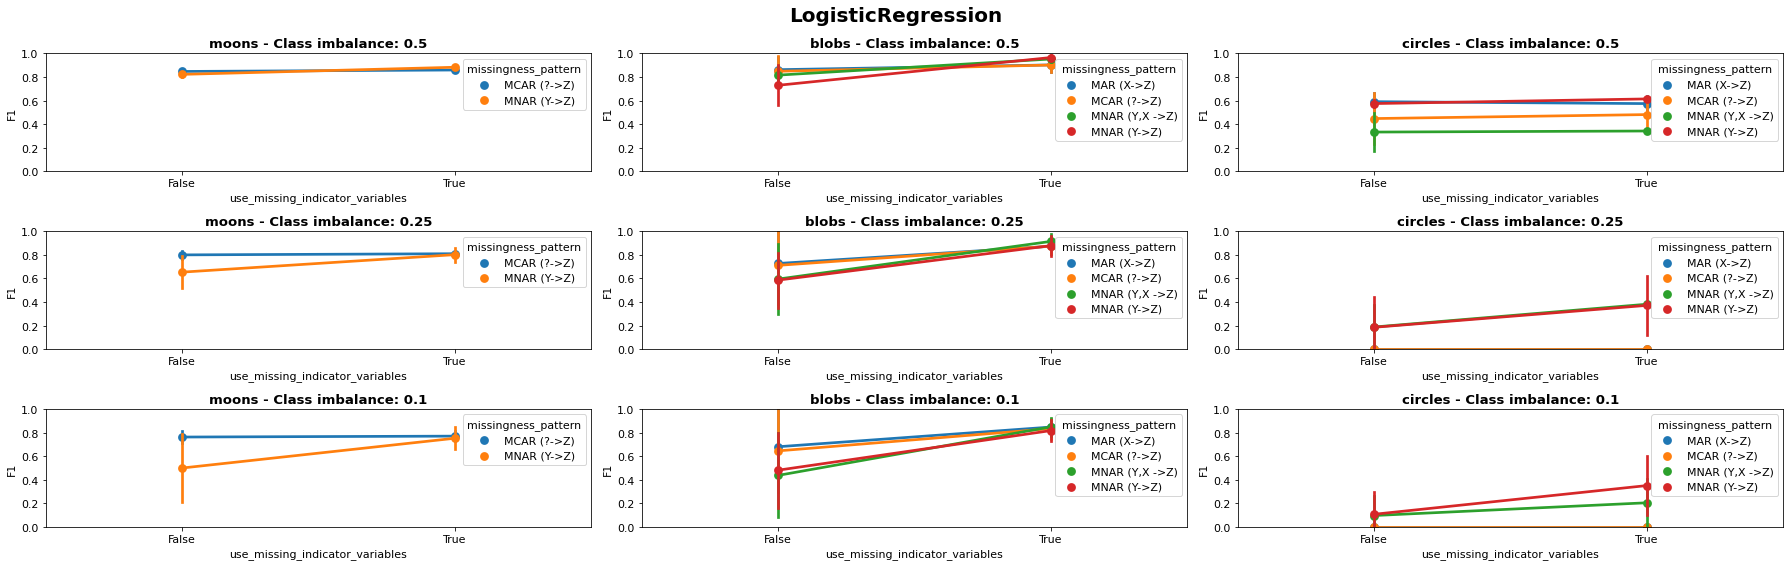

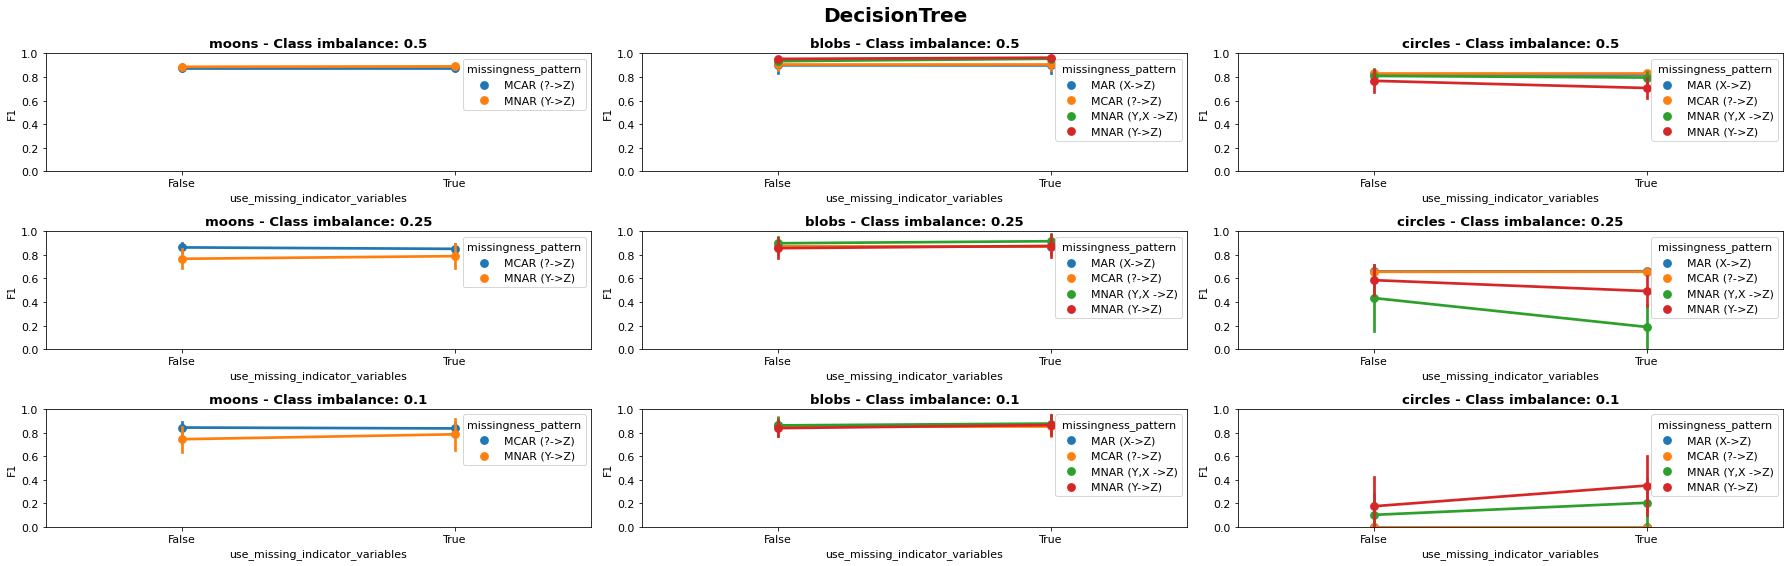

In [102]:
for approach in ['nam', 'xgboost', 'ebm', 'LogisticRegression', 'DecisionTree']:
    results = final_df[final_df['approach'] ==  approach]

    x = 'use_missing_indicator_variables'
    hue = 'missingness_pattern'


    fig, axes = plt.subplots(3, 3, figsize=(25, 8))
    fig.suptitle(approach, weight='bold', fontsize=20)

    for i, imbalance_ratio in enumerate(sorted(results['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):


            df = results[(results['imbalance_ratio']==imbalance_ratio) & (results['dataset_name']==dataset_name)]

            #assert check_unicity(df, x, hue)

            if len(df) > 0:

                axes[i][j] = sns.pointplot(data=df, x=x, y="F1", hue=hue, ci='sd', ax = axes[i][j])
                axes[i][j].set_ylim([0,1])
                axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
            else:
                axes[i][j].grid('off');axes[i][j].axis('off')

    plt.tight_layout()

**Does the importance improve when the ratio increases ?**

In [107]:
def check_unicity(df, x, hue):
    for _, f in df.groupby(by=[x, hue]):
        if len(f) > 1:
            display(f)
            return False
    return True

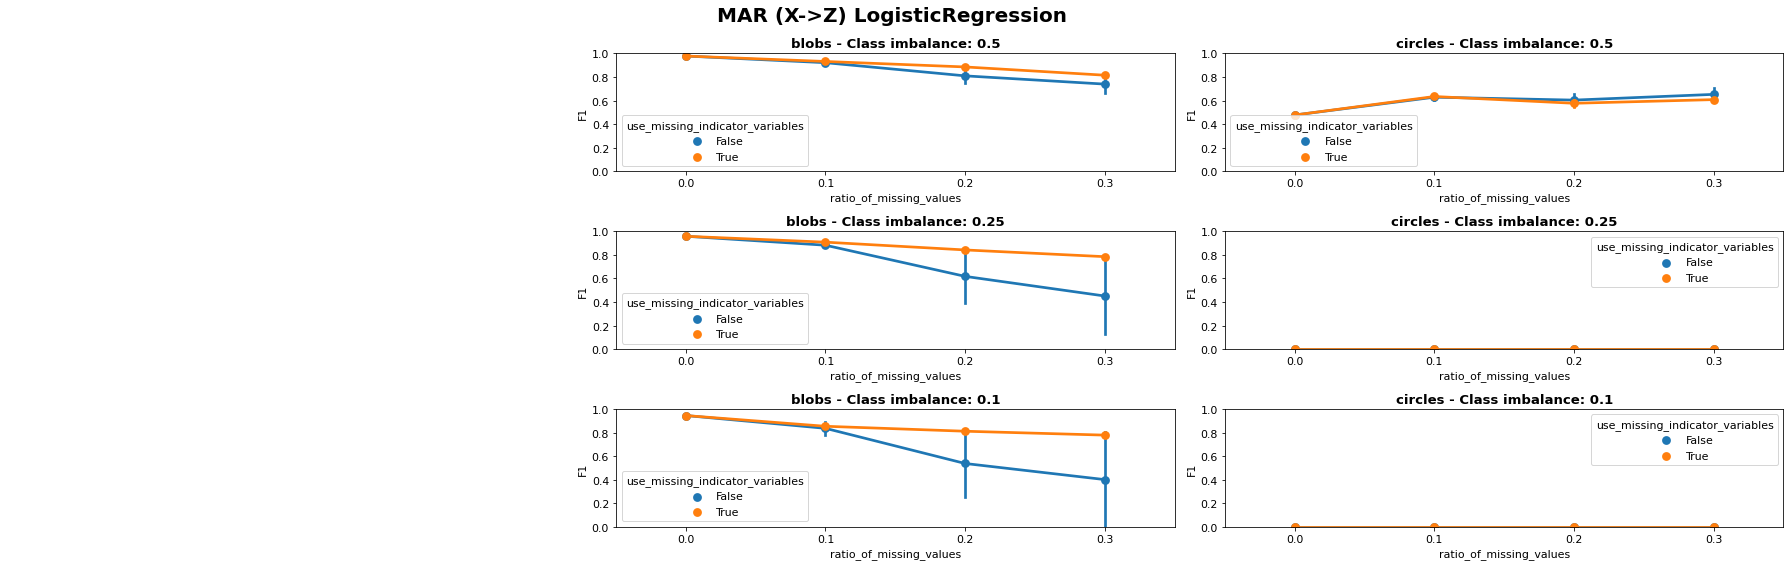

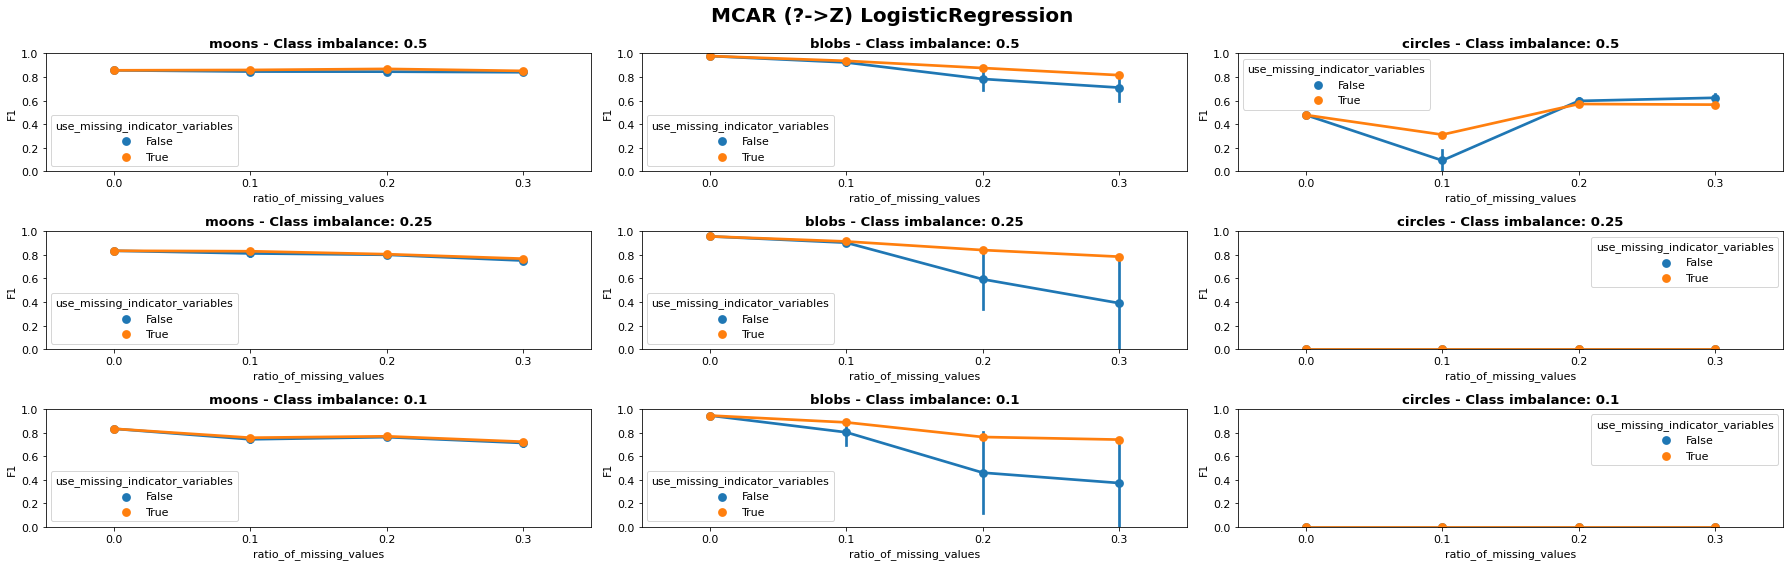

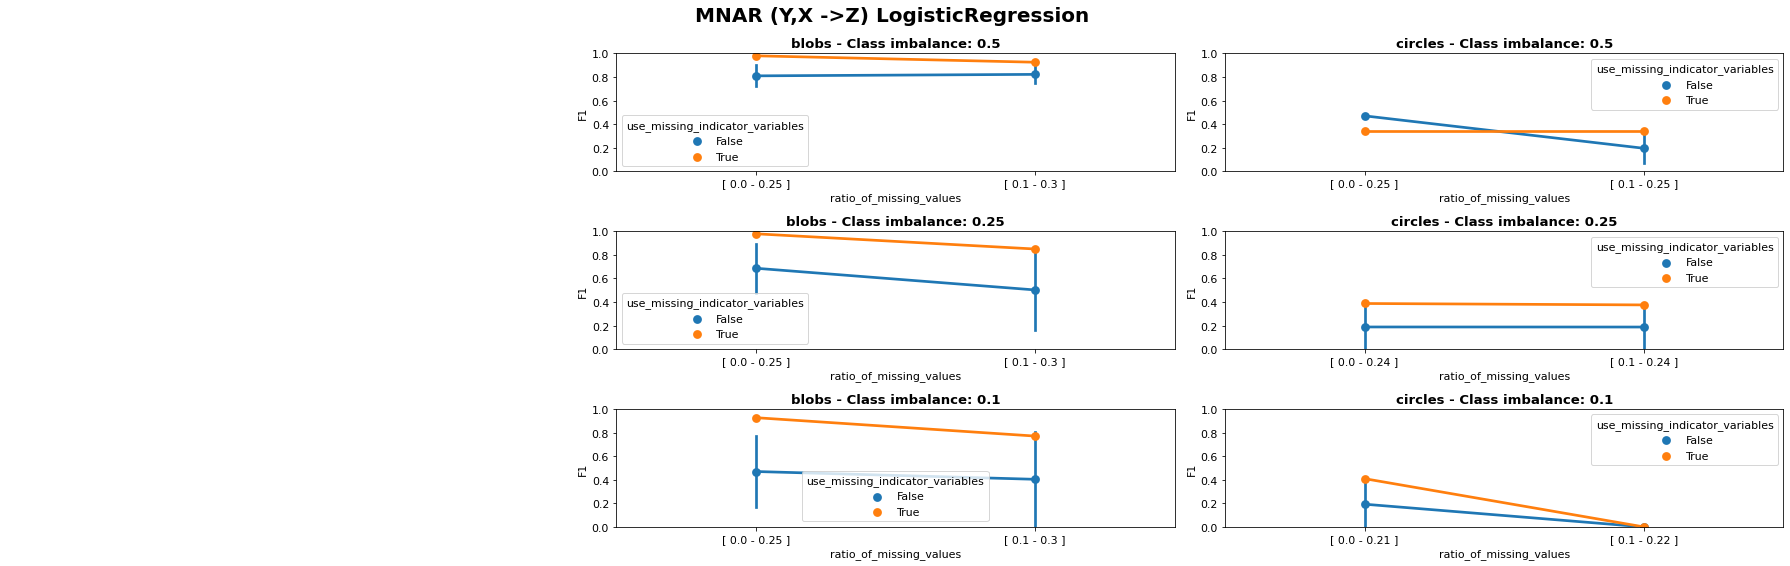

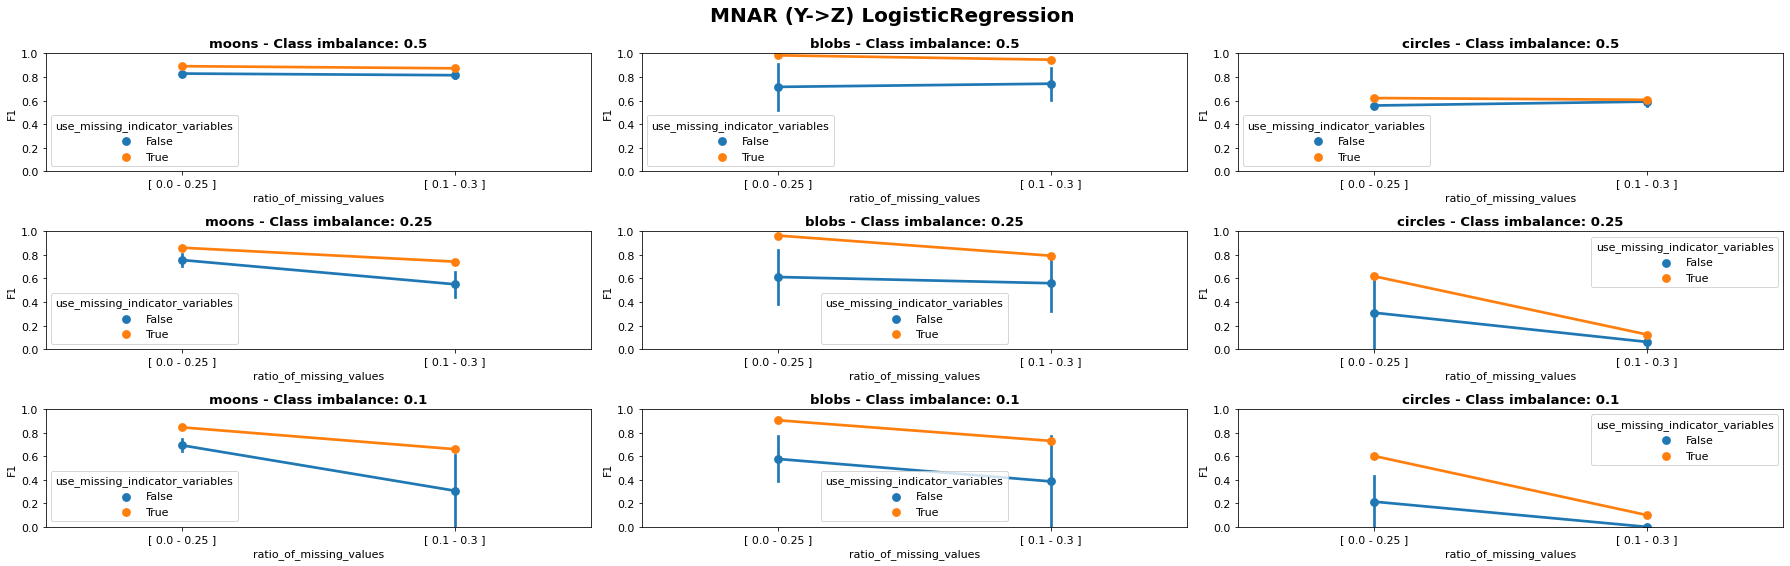

In [104]:
for approach in ['LogisticRegression']:
    for missingness_pattern in final_df['missingness_pattern'].unique():
        results = final_df[final_df['approach'] ==  approach]

        x = 'ratio_of_missing_values'
        hue = 'use_missing_indicator_variables'


        fig, axes = plt.subplots(3, 3, figsize=(25, 8))
        fig.suptitle("{} {} ".format(missingness_pattern,approach), weight='bold', fontsize=20)

        for i, imbalance_ratio in enumerate(sorted(results['imbalance_ratio'].unique(), reverse=True)):

            for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):


                df = results[(results['imbalance_ratio']==imbalance_ratio) & 
                             (results['dataset_name']==dataset_name) & 
                             (results['missingness_pattern']==missingness_pattern)]

                #assert check_unicity(df, x, hue)

                if len(df) > 0:

                    axes[i][j] = sns.pointplot(data=df, x=x, y="F1", hue=hue, ci='sd', ax = axes[i][j])
                    axes[i][j].set_ylim([0,1])
                    axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
                else:
                    axes[i][j].grid('off');axes[i][j].axis('off')

        plt.tight_layout()

# Preliminary experiment 3: Is it better to impute, encode, or do nothing (if relevant)? 

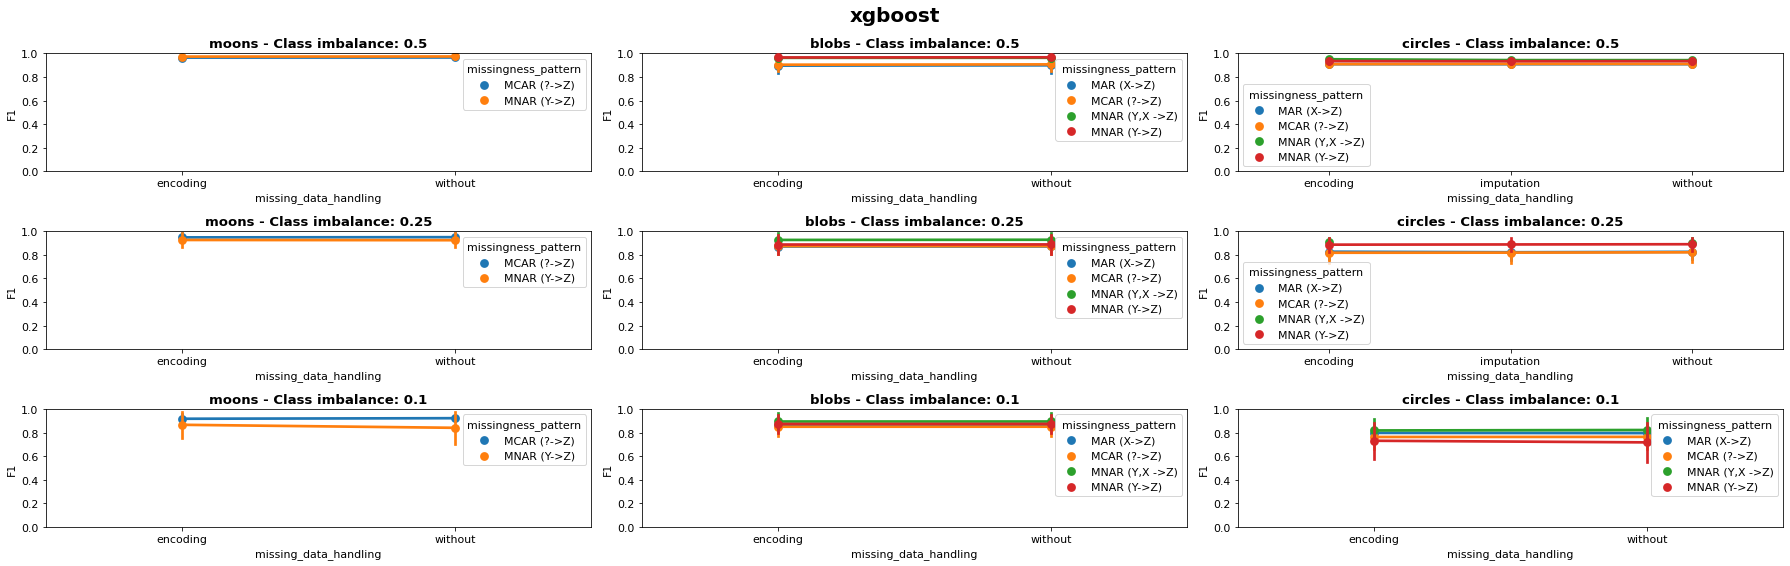

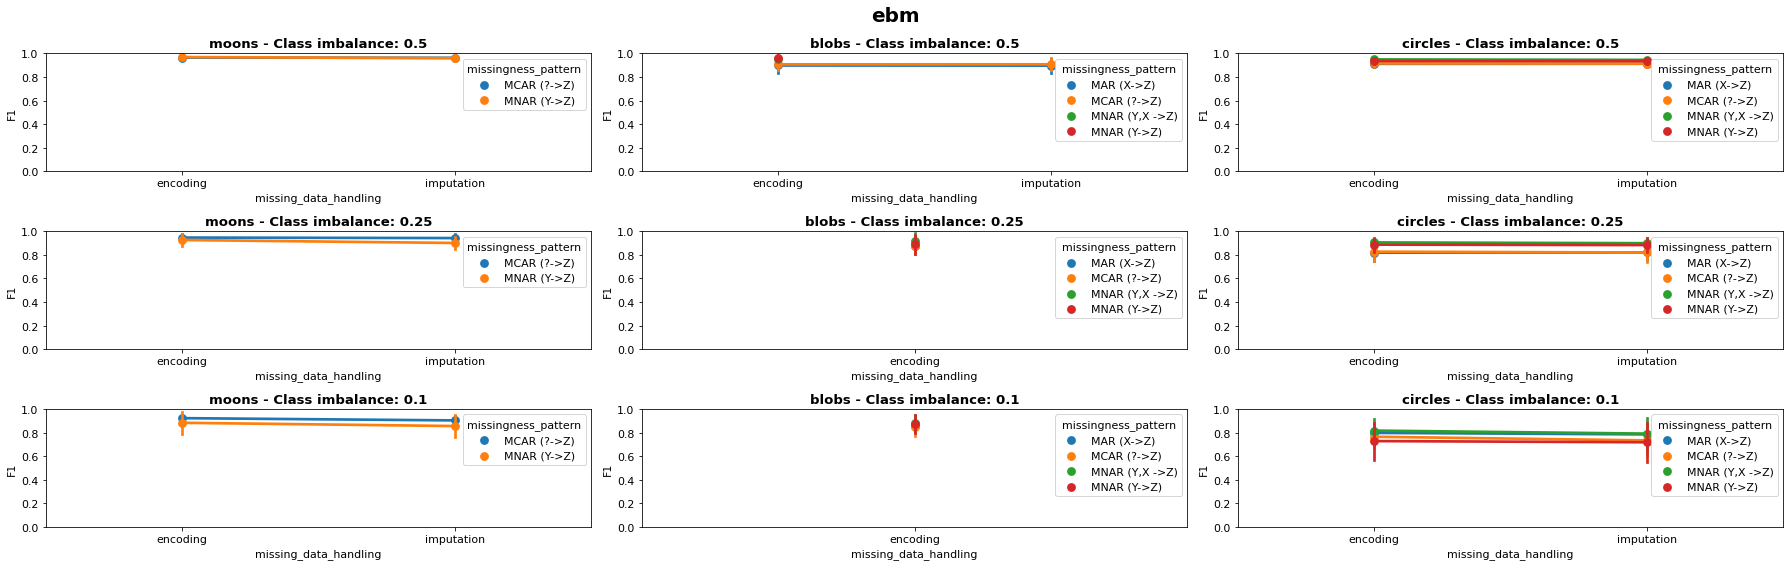

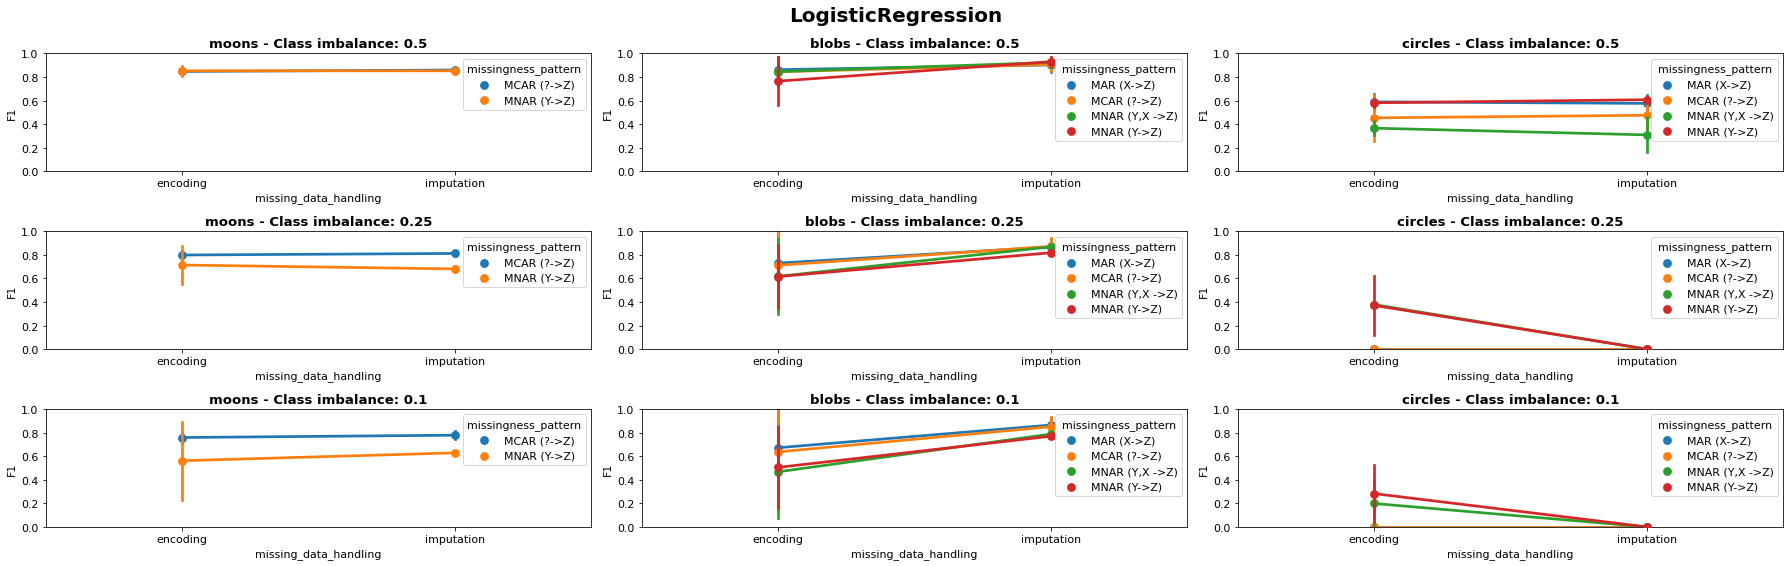

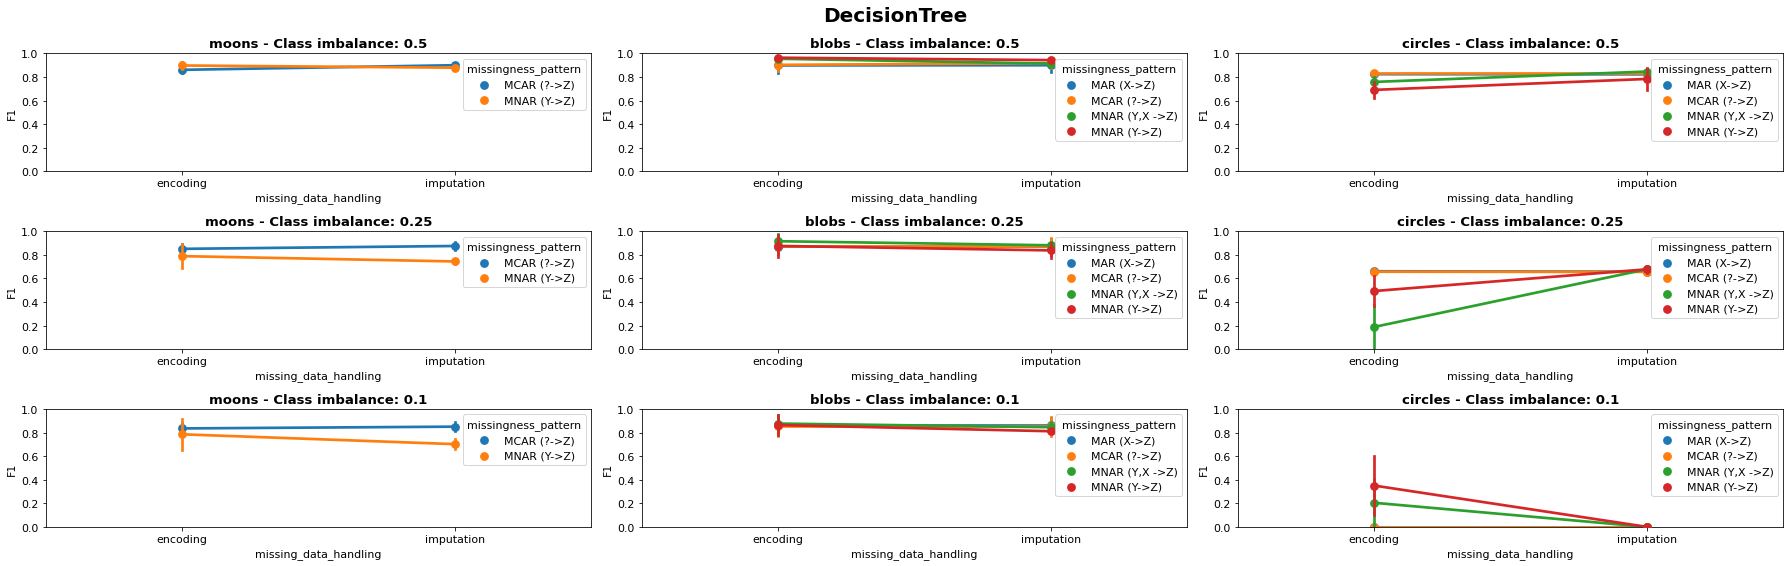

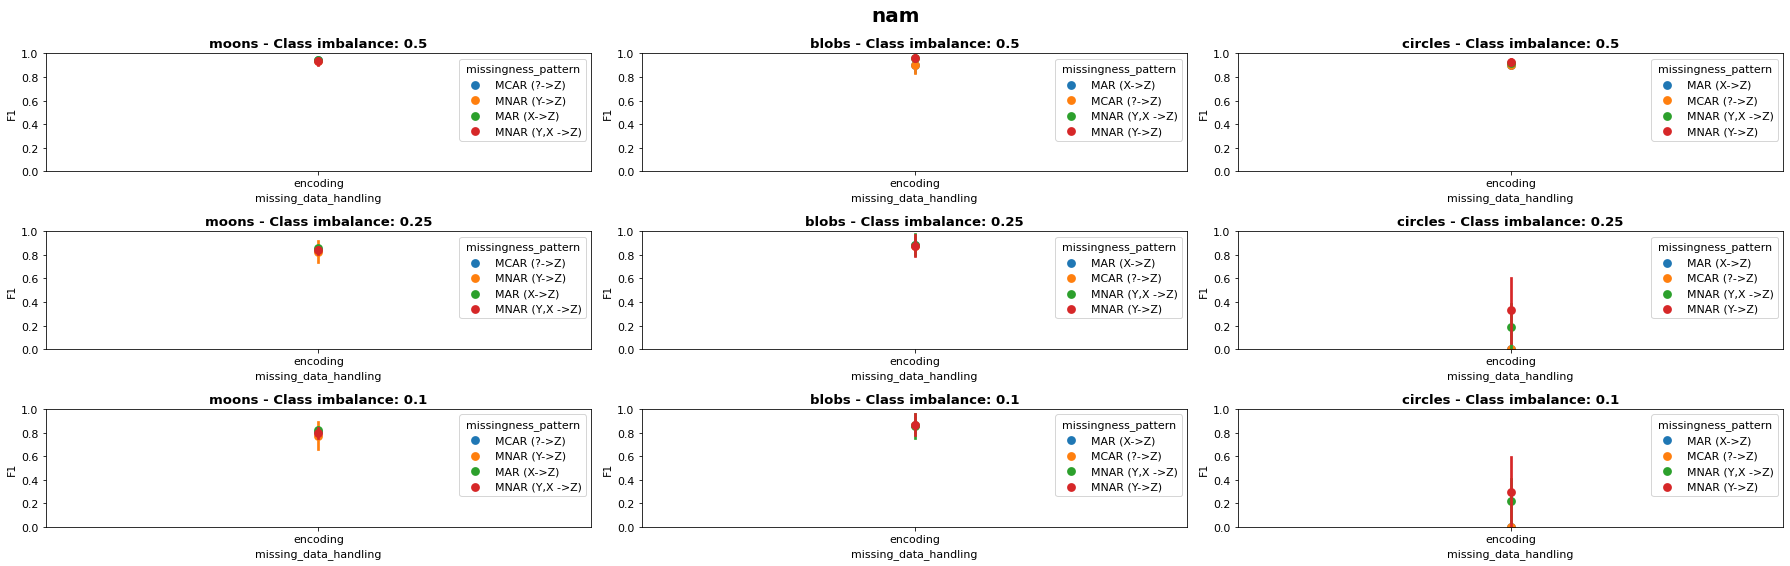

In [112]:
for approach in ['xgboost', 'ebm', 'LogisticRegression', 'DecisionTree', 'nam']:
    results = final_df[final_df['approach'] ==  approach]

    x = 'missing_data_handling'
    hue = 'missingness_pattern'


    fig, axes = plt.subplots(3, 3, figsize=(25, 8))
    fig.suptitle(approach, weight='bold', fontsize=20)

    for i, imbalance_ratio in enumerate(sorted(results['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):


            df = results[(results['imbalance_ratio']==imbalance_ratio) & (results['dataset_name']==dataset_name)]

            #assert check_unicity(df, x, hue)

            if len(df) > 0:

                axes[i][j] = sns.pointplot(data=df, x=x, y="F1", hue=hue, ci='sd', ax = axes[i][j])
                axes[i][j].set_ylim([0,1])
                axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
            else:
                axes[i][j].grid('off');axes[i][j].axis('off')

    plt.tight_layout()

# Result 1: comparison between approaches on the three dataset for different level of CI and MR 

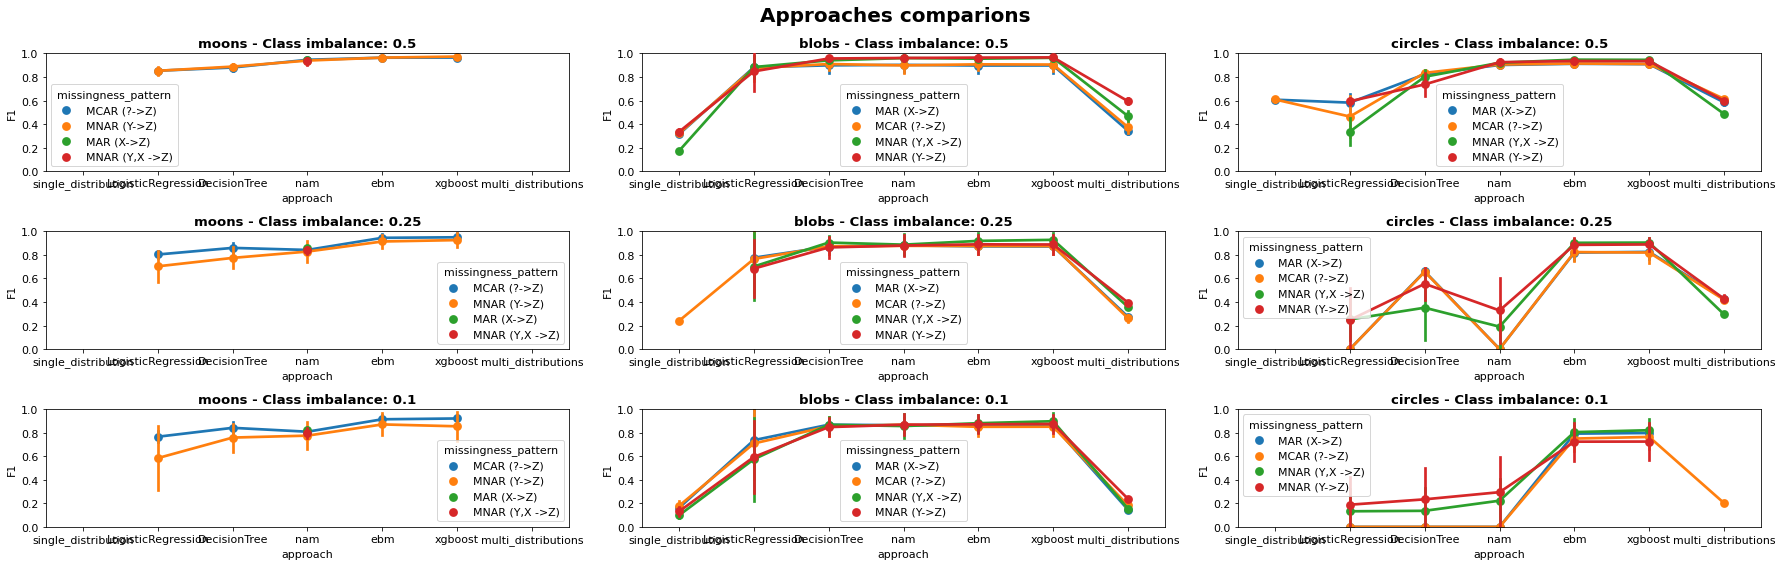

In [100]:
results = final_df#[final_df['approach'].isin(['single_distribution', 'multi_distributions'])]

x = 'approach'
hue = 'missingness_pattern'
    
    
fig, axes = plt.subplots(3, 3, figsize=(25, 8))
fig.suptitle("Approaches comparions", weight='bold', fontsize=20)

for i, imbalance_ratio in enumerate(sorted(results['imbalance_ratio'].unique(), reverse=True)):

    for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):


        df = results[(results['imbalance_ratio']==imbalance_ratio) & (results['dataset_name']==dataset_name)]

        #assert check_unicity(df, x, hue)

        if len(df) > 0:

            axes[i][j] = sns.pointplot(data=df, x=x, y="F1", hue=hue, order=['single_distribution', 'LogisticRegression', 'DecisionTree', 'nam', 'ebm', 'xgboost', 'multi_distributions'], ci='sd', ax = axes[i][j])
            axes[i][j].set_ylim([0,1])
            axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
        else:
            axes[i][j].grid('off');axes[i][j].axis('off')

plt.tight_layout()

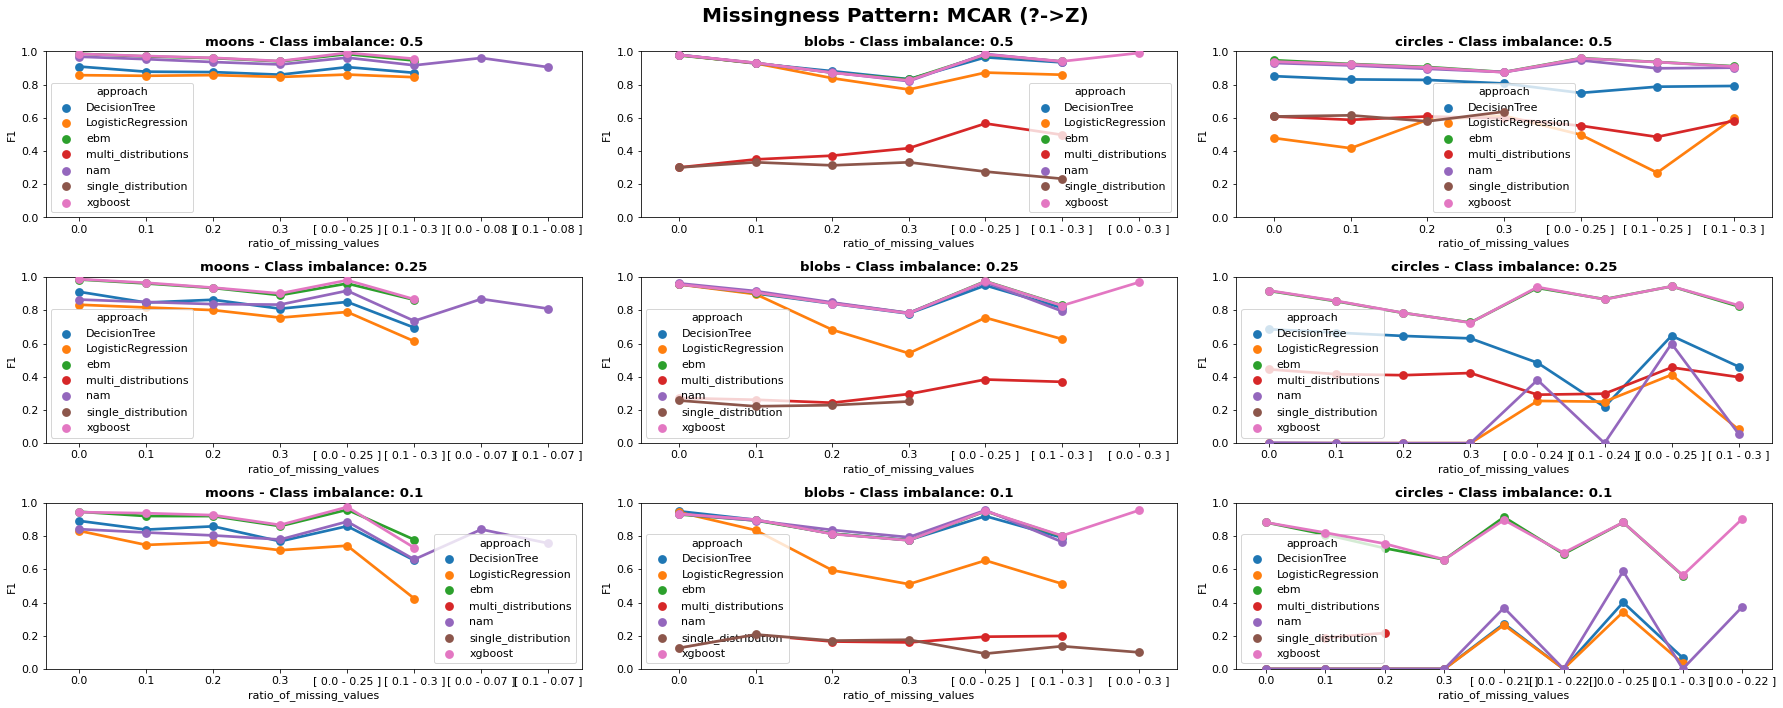

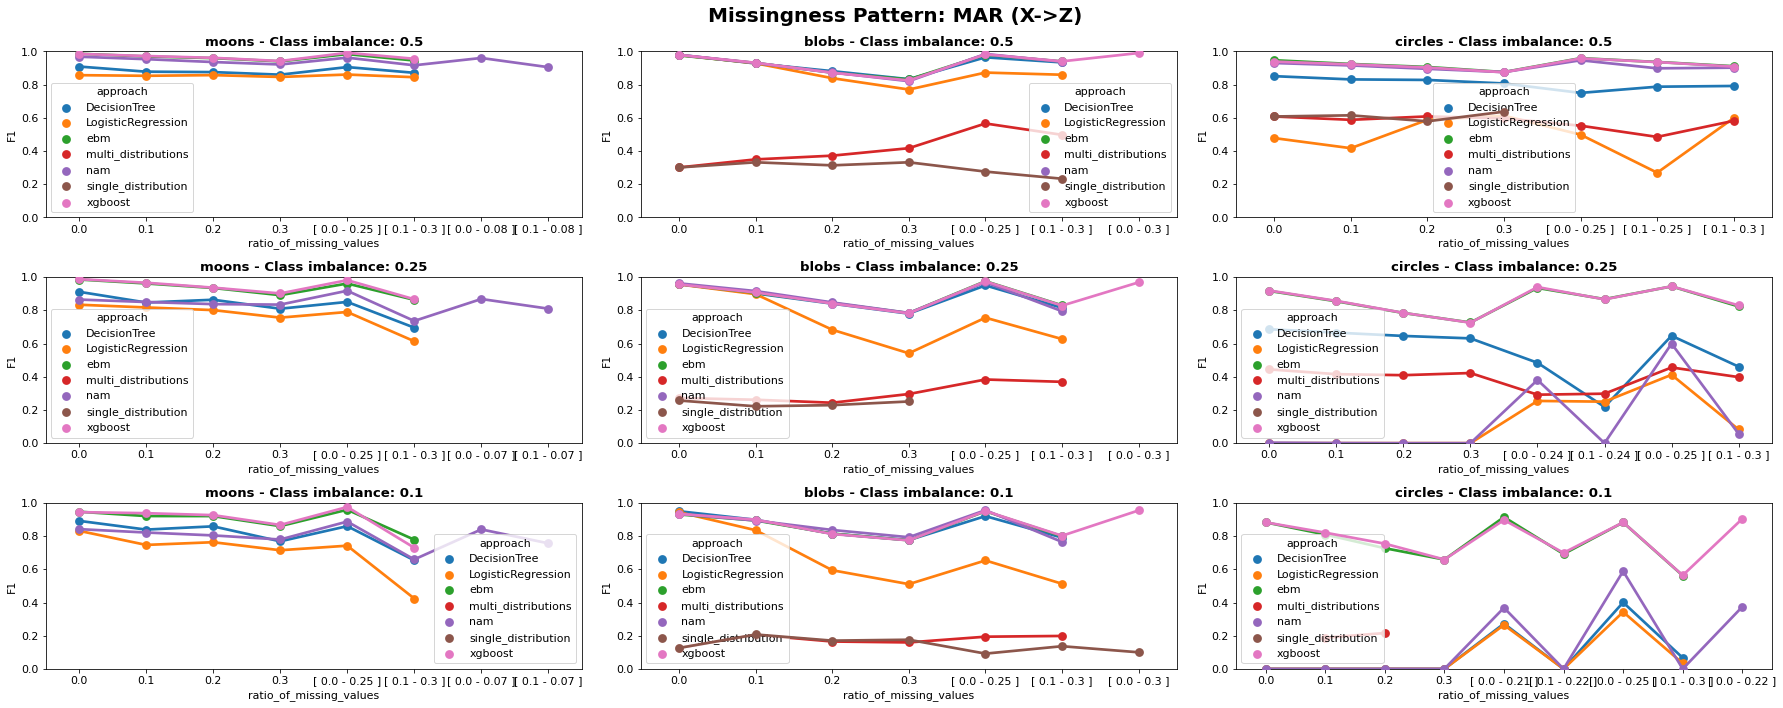

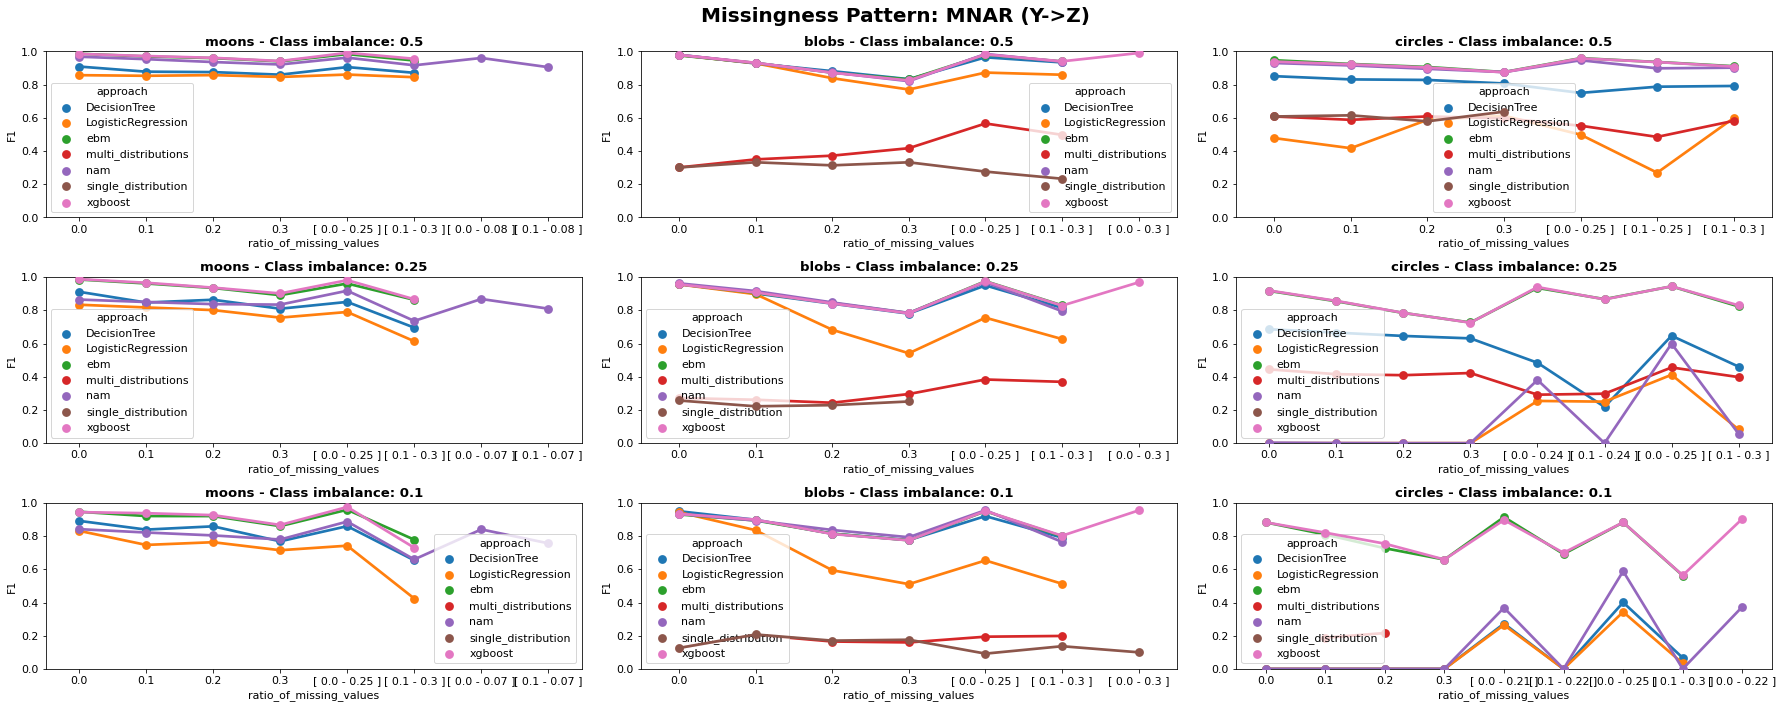

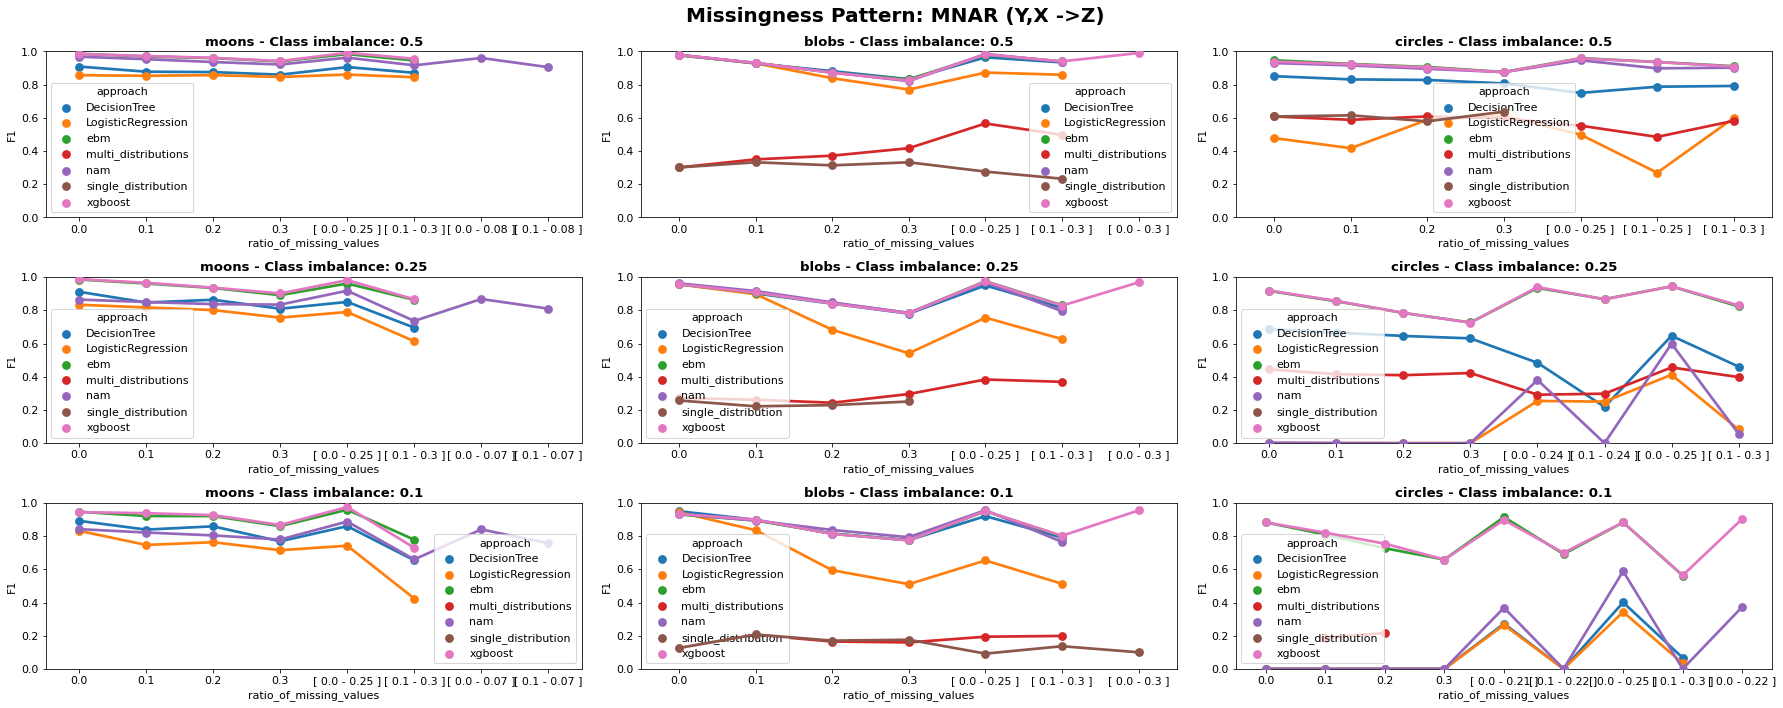

In [101]:
for missingness_pattern in [1, 3, 4, 5]:
    
    fig, axes = plt.subplots(3, 3, figsize=(25, 10))
    fig.suptitle("Missingness Pattern: {}".format(DICT_MISSINGNESS[missingness_pattern]), weight='bold', fontsize=20)

    for i, imbalance_ratio in enumerate(sorted(final_df['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):

            df = final_df[(final_df['imbalance_ratio']==imbalance_ratio) & (final_df['dataset_name']==dataset_name)]

            axes[i][j] = sns.pointplot(data=df, x="ratio_of_missing_values", y="F1", hue='approach', hue_order = final_df['approach'].unique(), ci=False, ax = axes[i][j])
            axes[i][j].set_ylim([0,1])
            axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
            
    plt.tight_layout()

# Results 2: How the different approaches are influence of the class imbalance and missing ratio

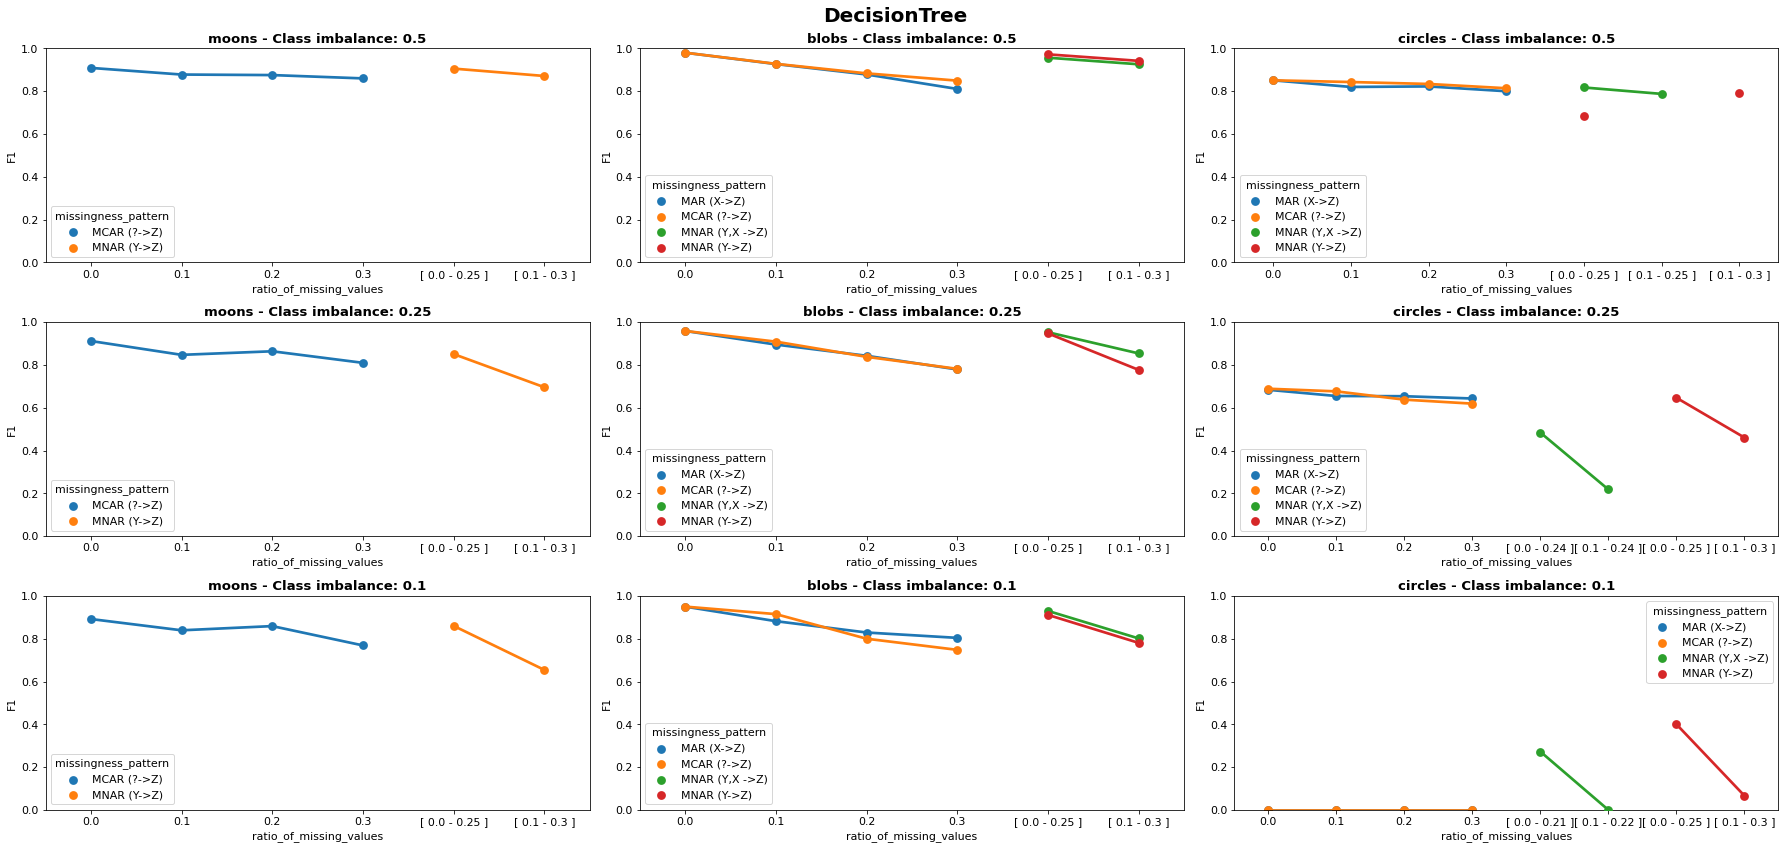

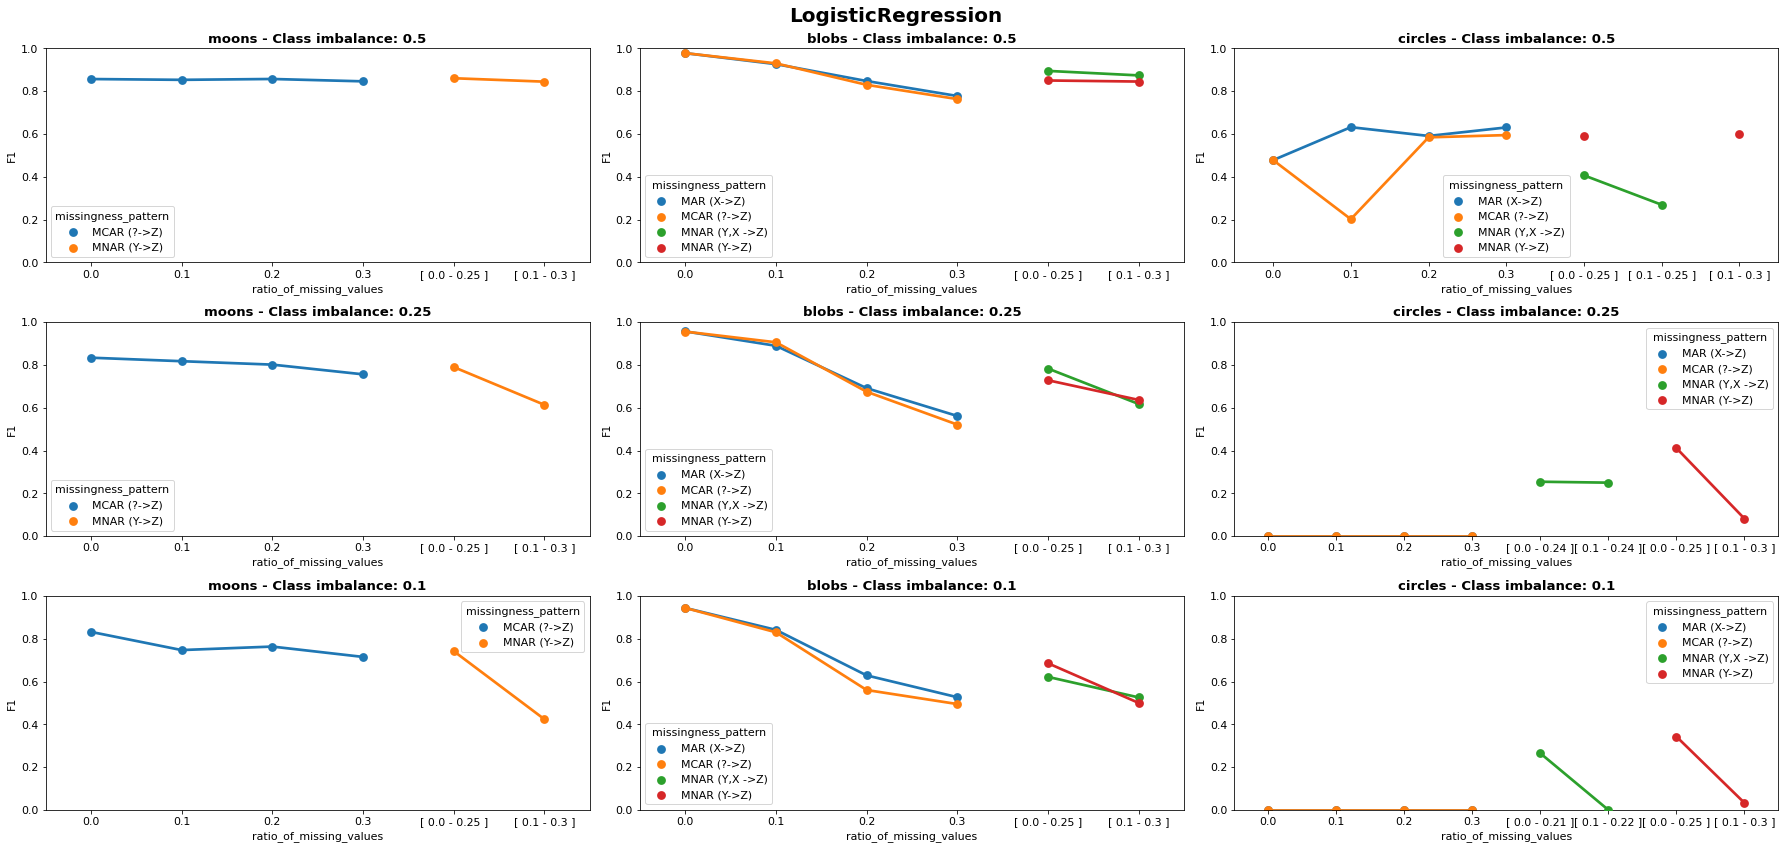

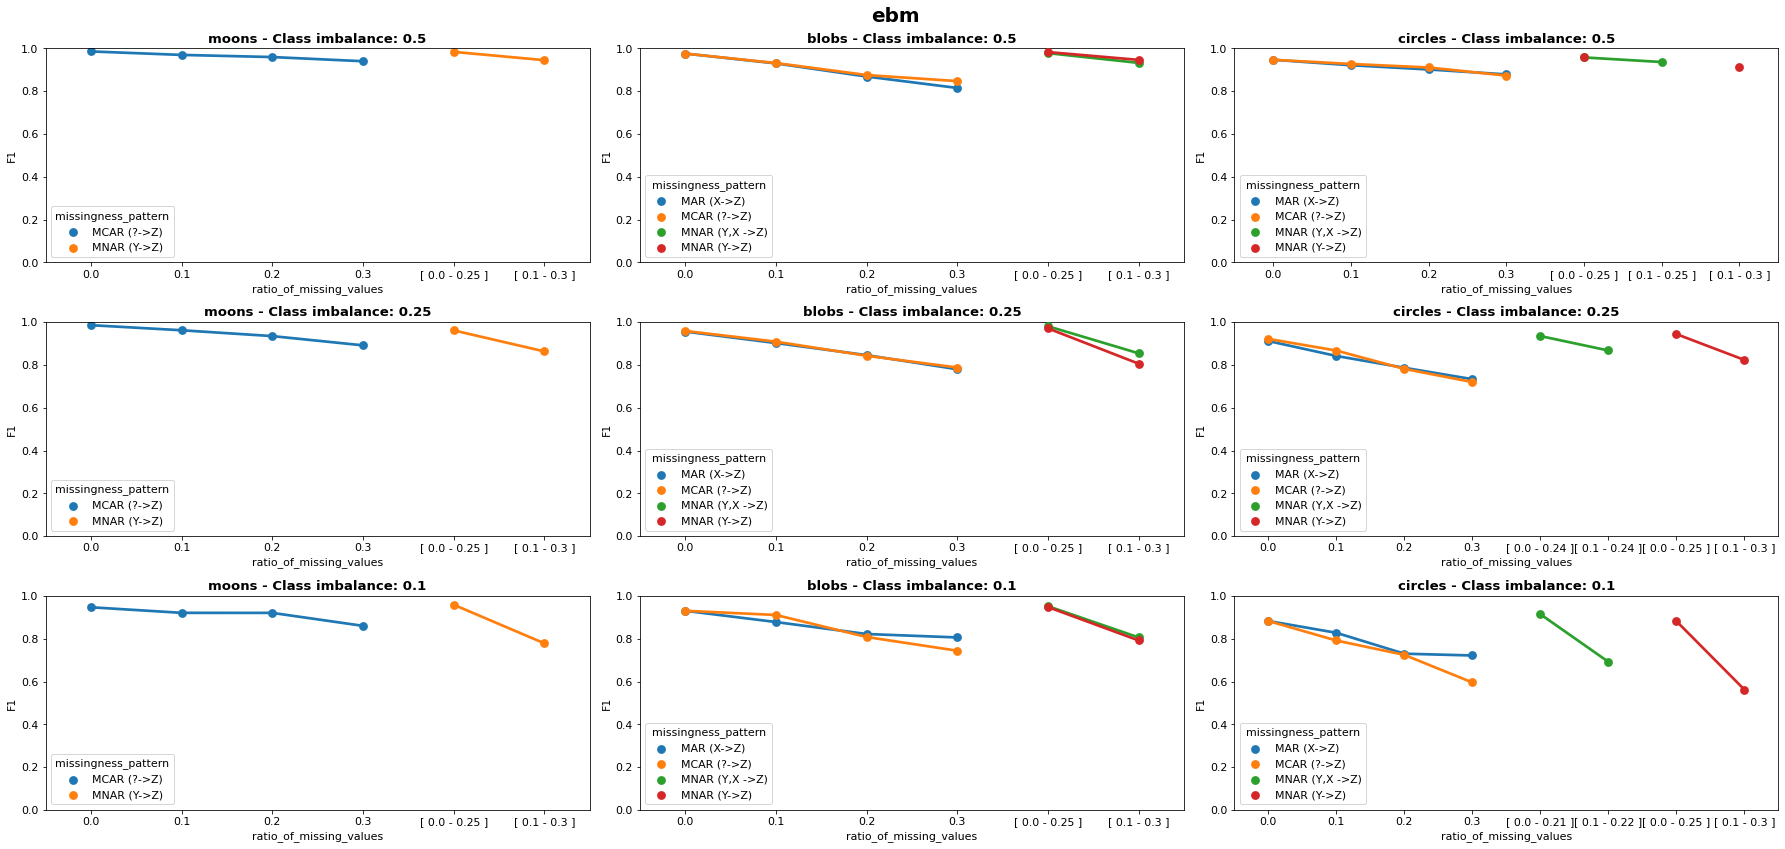

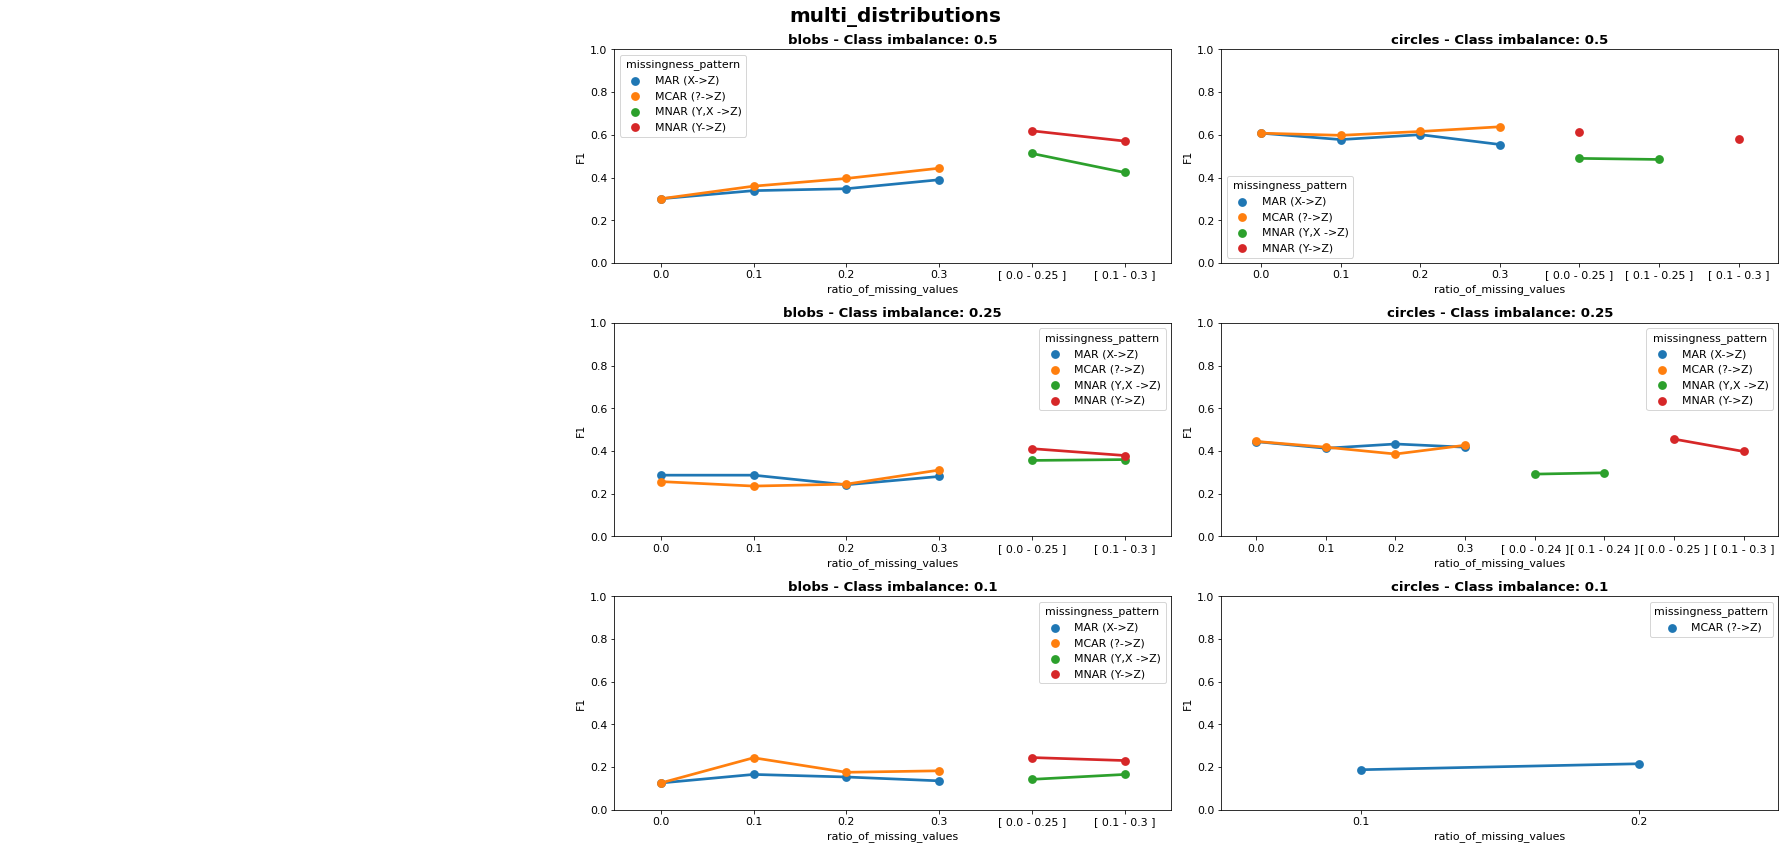

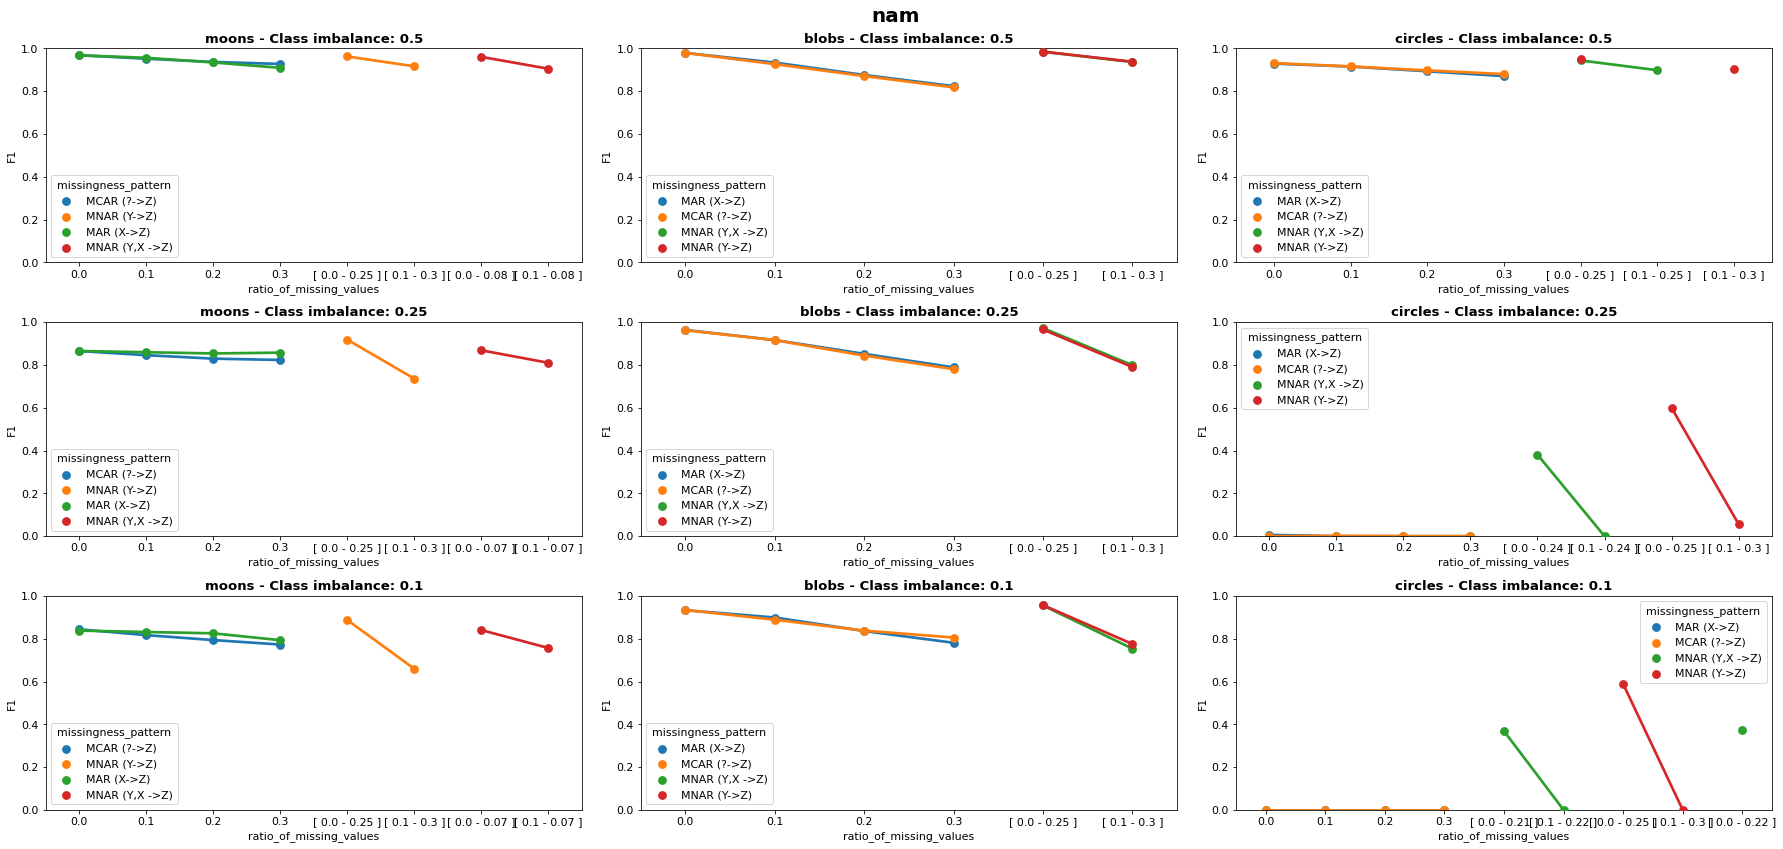

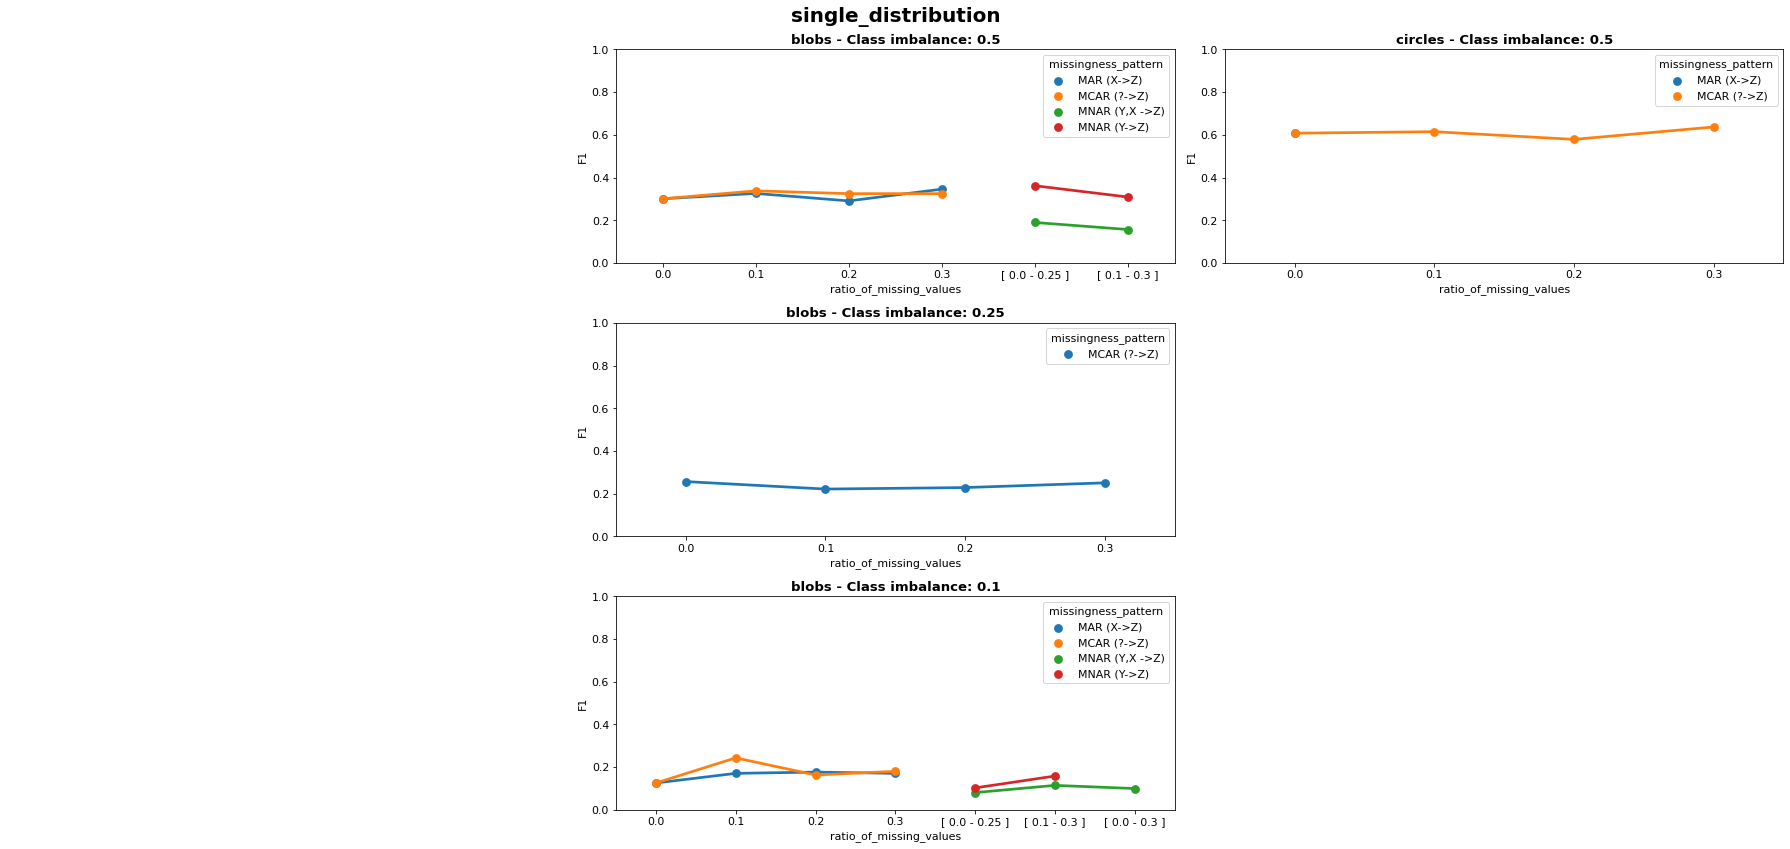

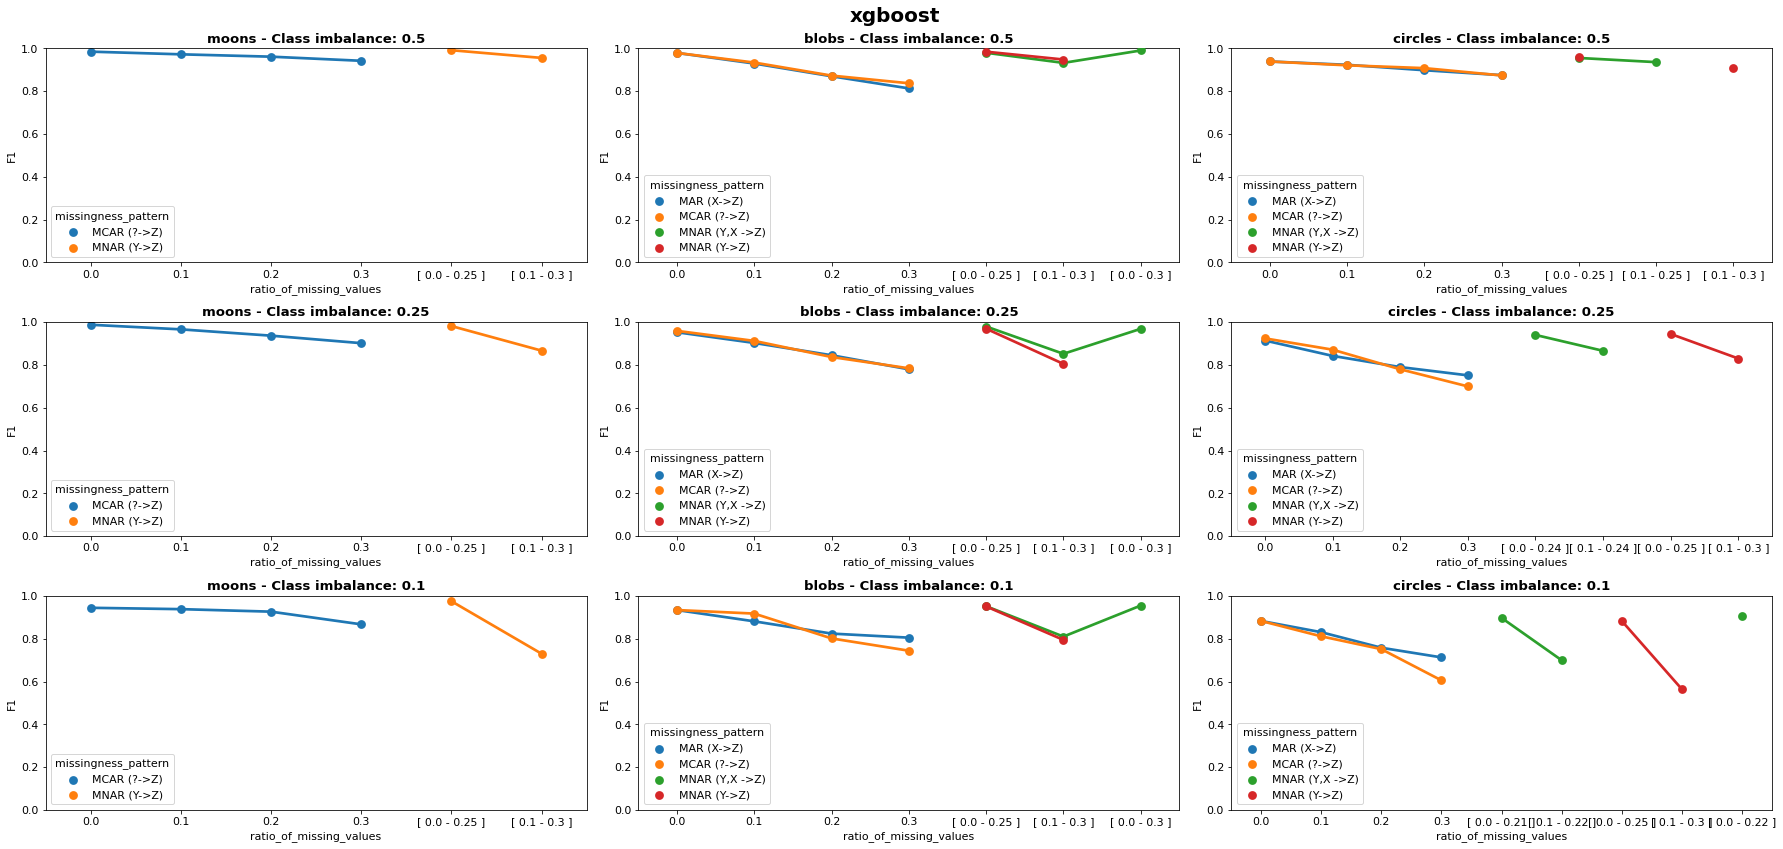

In [99]:
for approach in final_df['approach'].unique():
    fig, axes = plt.subplots(3, 3, figsize=(25, 12))
    fig.suptitle(approach, weight='bold', fontsize=20)

    for i, imbalance_ratio in enumerate(sorted(final_df['imbalance_ratio'].unique(), reverse=True)):

        for j, dataset_name in enumerate(['moons', 'blobs', 'circles']):

            df = final_df[(final_df['approach']==approach) & (final_df['imbalance_ratio']==imbalance_ratio) & (final_df['dataset_name']==dataset_name)]

            if len(df) > 1:

                axes[i][j] = sns.pointplot(data=df, x="ratio_of_missing_values", y="F1", hue='missingness_pattern', ci=False, ax = axes[i][j])
                axes[i][j].set_ylim([0,1])
                axes[i][j].set_title("{} - Class imbalance: {}".format(dataset_name, imbalance_ratio), weight='bold')
            else:
                axes[i][j].grid('off');axes[i][j].axis('off')

    plt.tight_layout()